# House Prices - Advanced Regression Techniques

In [1087]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.impute import SimpleImputer
from IPython.display import display, HTML
import seaborn as sns
from matplotlib.patches import Patch
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import LabelEncoder

## 0. Información de las columnas


**SalePrice**: El precio de venta de la propiedad en dólares. Esta es la variable objetivo que se intenta predecir.

### Características generales de la propiedad:

- **MSSubClass**: La clase de edificio
- **MSZoning**: La clasificación general de zonificación
- **LotFrontage**: Pies lineales de calle conectados a la propiedad
- **LotArea**: Tamaño del lote en pies cuadrados
- **Street**: Tipo de acceso a la calle
- **Alley**: Tipo de acceso al callejón
- **LotShape**: Forma general de la propiedad
- **LandContour**: Planicie de la propiedad
- **Utilities**: Tipo de servicios públicos disponibles
- **LotConfig**: Configuración del lote
- **LandSlope**: Pendiente de la propiedad
- **Neighborhood**: Ubicaciones físicas dentro de los límites de la ciudad de Ames
- **Condition1** y **Condition2**: Proximidad a la carretera principal o ferrocarril

### Tipo y estilo de vivienda:

- **BldgType**: Tipo de vivienda
- **HouseStyle**: Estilo de la vivienda
- **OverallQual**: Calidad general del material y acabado
- **OverallCond**: Calificación general de la condición
- **YearBuilt**: Fecha de construcción original
- **YearRemodAdd**: Fecha de remodelación

### Características exteriores:

- **RoofStyle**: Tipo de techo
- **RoofMatl**: Material del techo
- **Exterior1st** y **Exterior2nd**: Revestimiento exterior de la casa
- **MasVnrType**: Tipo de revestimiento de mampostería
- **MasVnrArea**: Área de revestimiento de mampostería en pies cuadrados
- **ExterQual**: Calidad del material exterior
- **ExterCond**: Condición actual del material en el exterior

### Características del sótano:

- **Foundation**: Tipo de cimientos
- **BsmtQual**: Altura del sótano
- **BsmtCond**: Condición general del sótano
- **BsmtExposure**: Paredes del sótano a nivel de jardín o con salida
- **BsmtFinType1** y **BsmtFinType2**: Calidad del área terminada del sótano
- **BsmtFinSF1** y **BsmtFinSF2**: Pies cuadrados terminados de tipo 1 y 2
- **BsmtUnfSF**: Pies cuadrados sin terminar del área del sótano
- **TotalBsmtSF**: Pies cuadrados totales del área del sótano

### Sistemas y comodidades:

- **Heating**: Tipo de calefacción
- **HeatingQC**: Calidad y condición de la calefacción
- **CentralAir**: Aire acondicionado central
- **Electrical**: Sistema eléctrico

### Áreas de vivienda:

- **1stFlrSF**: Pies cuadrados del primer piso
- **2ndFlrSF**: Pies cuadrados del segundo piso
- **LowQualFinSF**: Pies cuadrados terminados de baja calidad (todos los pisos)
- **GrLivArea**: Área habitable sobre el suelo en pies cuadrados

### Baños y habitaciones:

- **BsmtFullBath**: Baños completos en el sótano
- **BsmtHalfBath**: Medios baños en el sótano
- **FullBath**: Baños completos sobre el nivel del suelo
- **HalfBath**: Medios baños sobre el nivel del suelo
- **Bedroom**: Número de dormitorios sobre el nivel del sótano
- **Kitchen**: Número de cocinas
- **KitchenQual**: Calidad de la cocina
- **TotRmsAbvGrd**: Total de habitaciones sobre el nivel del suelo (no incluye baños)
- **Functional**: Calificación de funcionalidad del hogar

### Características adicionales:

- **Fireplaces**: Número de chimeneas
- **FireplaceQu**: Calidad de la chimenea
- **GarageType**: Ubicación del garaje
- **GarageYrBlt**: Año en que se construyó el garaje
- **GarageFinish**: Acabado interior del garaje
- **GarageCars**: Tamaño del garaje en capacidad de autos
- **GarageArea**: Tamaño del garaje en pies cuadrados
- **GarageQual**: Calidad del garaje
- **GarageCond**: Condición del garaje
- **PavedDrive**: Entrada de coches pavimentada
- **WoodDeckSF**: Área de terraza de madera en pies cuadrados
- **OpenPorchSF**: Área de porche abierto en pies cuadrados
- **EnclosedPorch**: Área de porche cerrado en pies cuadrados
- **3SsnPorch**: Área de porche de tres estaciones en pies cuadrados
- **ScreenPorch**: Área de porche con mosquitero en pies cuadrados
- **PoolArea**: Área de la piscina en pies cuadrados
- **PoolQC**: Calidad de la piscina
- **Fence**: Calidad de la cerca
- **MiscFeature**: Característica miscelánea no cubierta en otras categorías
- **MiscVal**: Valor en $ de la característica miscelánea

### Información de venta:

- **MoSold**: Mes de venta
- **YrSold**: Año de venta
- **SaleType**: Tipo de venta
- **SaleCondition**: Condición de la venta


In [878]:
variables_dict = {
    # Variable objetivo
    'SalePrice': 'Precio de venta de la propiedad en dólares',
    
    # Características generales de la propiedad
    'MSSubClass': 'Clase de edificio',
    'MSZoning': 'Clasificación general de zonificación',
    'LotFrontage': 'Pies lineales de calle conectados a la propiedad',
    'LotArea': 'Tamaño del lote en pies cuadrados',
    'Street': 'Tipo de acceso a la calle',
    'Alley': 'Tipo de acceso al callejón',
    'LotShape': 'Forma general de la propiedad',
    'LandContour': 'Planicie de la propiedad',
    'Utilities': 'Tipo de servicios públicos disponibles',
    'LotConfig': 'Configuración del lote',
    'LandSlope': 'Pendiente de la propiedad',
    'Neighborhood': 'Ubicaciones físicas dentro de los límites de la ciudad de Ames',
    'Condition1': 'Proximidad a la carretera principal o ferrocarril',
    'Condition2': 'Proximidad a la carretera principal o ferrocarril (si hay una segunda)',
    
    # Tipo y estilo de vivienda
    'BldgType': 'Tipo de vivienda',
    'HouseStyle': 'Estilo de la vivienda',
    'OverallQual': 'Calidad general del material y acabado',
    'OverallCond': 'Calificación general de la condición',
    'YearBuilt': 'Fecha de construcción original',
    'YearRemodAdd': 'Fecha de remodelación',
    
    # Características exteriores
    'RoofStyle': 'Tipo de techo',
    'RoofMatl': 'Material del techo',
    'Exterior1st': 'Revestimiento exterior de la casa',
    'Exterior2nd': 'Revestimiento exterior secundario de la casa',
    'MasVnrType': 'Tipo de revestimiento de mampostería',
    'MasVnrArea': 'Área de revestimiento de mampostería en pies cuadrados',
    'ExterQual': 'Calidad del material exterior',
    'ExterCond': 'Condición actual del material en el exterior',
    
    # Características del sótano
    'Foundation': 'Tipo de cimientos',
    'BsmtQual': 'Altura del sótano',
    'BsmtCond': 'Condición general del sótano',
    'BsmtExposure': 'Paredes del sótano a nivel de jardín o con salida',
    'BsmtFinType1': 'Calidad del área terminada del sótano',
    'BsmtFinType2': 'Calidad de la segunda área terminada del sótano (si existe)',
    'BsmtFinSF1': 'Pies cuadrados terminados de tipo 1',
    'BsmtFinSF2': 'Pies cuadrados terminados de tipo 2',
    'BsmtUnfSF': 'Pies cuadrados sin terminar del área del sótano',
    'TotalBsmtSF': 'Pies cuadrados totales del área del sótano',
    
    # Sistemas y comodidades
    'Heating': 'Tipo de calefacción',
    'HeatingQC': 'Calidad y condición de la calefacción',
    'CentralAir': 'Aire acondicionado central',
    'Electrical': 'Sistema eléctrico',
    
    # Áreas de vivienda
    '1stFlrSF': 'Pies cuadrados del primer piso',
    '2ndFlrSF': 'Pies cuadrados del segundo piso',
    'LowQualFinSF': 'Pies cuadrados terminados de baja calidad (todos los pisos)',
    'GrLivArea': 'Área habitable sobre el suelo en pies cuadrados',
    
    # Baños y habitaciones
    'BsmtFullBath': 'Baños completos en el sótano',
    'BsmtHalfBath': 'Medios baños en el sótano',
    'FullBath': 'Baños completos sobre el nivel del suelo',
    'HalfBath': 'Medios baños sobre el nivel del suelo',
    'Bedroom': 'Número de dormitorios sobre el nivel del sótano',
    'Kitchen': 'Número de cocinas',
    'KitchenQual': 'Calidad de la cocina',
    'TotRmsAbvGrd': 'Total de habitaciones sobre el nivel del suelo (no incluye baños)',
    'Functional': 'Calificación de funcionalidad del hogar',
    
    # Características adicionales
    'Fireplaces': 'Número de chimeneas',
    'FireplaceQu': 'Calidad de la chimenea',
    'GarageType': 'Ubicación del garaje',
    'GarageYrBlt': 'Año en que se construyó el garaje',
    'GarageFinish': 'Acabado interior del garaje',
    'GarageCars': 'Tamaño del garaje en capacidad de autos',
    'GarageArea': 'Tamaño del garaje en pies cuadrados',
    'GarageQual': 'Calidad del garaje',
    'GarageCond': 'Condición del garaje',
    'PavedDrive': 'Entrada de coches pavimentada',
    'WoodDeckSF': 'Área de terraza de madera en pies cuadrados',
    'OpenPorchSF': 'Área de porche abierto en pies cuadrados',
    'EnclosedPorch': 'Área de porche cerrado en pies cuadrados',
    '3SsnPorch': 'Área de porche de tres estaciones en pies cuadrados',
    'ScreenPorch': 'Área de porche con mosquitero en pies cuadrados',
    'PoolArea': 'Área de la piscina en pies cuadrados',
    'PoolQC': 'Calidad de la piscina',
    'Fence': 'Calidad de la cerca',
    'MiscFeature': 'Característica miscelánea no cubierta en otras categorías',
    'MiscVal': 'Valor en $ de la característica miscelánea',
    
    # Información de venta
    'MoSold': 'Mes de venta',
    'YrSold': 'Año de venta',
    'SaleType': 'Tipo de venta',
    'SaleCondition': 'Condición de la venta'
}

## 1. Método globales

In [574]:
from IPython.display import display, HTML

def scroll_box(contenido, altura_maxima=200):
    display(HTML(f"<div style='max-height: {altura_maxima}px; overflow-y: scroll;'>{contenido}</div>"))

## 2. Carga de datos

In [576]:
train = pd.read_csv("./info/train.csv")
test =  pd.read_csv("./info/test.csv")

In [514]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [578]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [580]:
print(f"Longitud de los datos de test: {len(test)} \nLongitud de los datos de entrenamiento: {len(train)} \nLongitud total de datos: {len(test)+len(train)}")

Longitud de los datos de test: 1459 
Longitud de los datos de entrenamiento: 1460 
Longitud total de datos: 2919


In [582]:
df = pd.concat([train, test], axis=0)
columnas = df.columns

In [584]:
columnas

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 3. Exploración inicial de los datos

### 3.1 Visión general del conjunto de datos

In [586]:
print(f"Hay {df.size} datos")

Hay 236439 datos


In [588]:
scroll_box(df.dtypes.to_frame().to_html() )

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object


In [590]:
# Cantidad de columnas por cada tipo de dato
print("Cantidad de variables por tipo de dato:")
print(df.dtypes.value_counts())

Cantidad de variables por tipo de dato:
object     43
int64      26
float64    12
Name: count, dtype: int64


In [592]:
# Separar columnas por tipo de dato
numericas = df.select_dtypes(include=['int64', 'float64'])
categoricas = df.select_dtypes(include=['object'])

In [594]:
print("Cantidad de variables numéricas:", len(numericas))
print("Variables numéricas:", len(numericas), end="\n\n")
scroll_box(numericas.columns.to_list())

Cantidad de variables numéricas: 2919
Variables numéricas: 2919



In [596]:
print("Cantidad de variables categóricas:", len(categoricas))
print("Variables categóricas:", len(categoricas), end="\n\n")
scroll_box(categoricas.columns.to_list())

Cantidad de variables categóricas: 2919
Variables numéricas: 2919



In [540]:
# Resumen estadístico variables numéricas y categóricas
print("Resumen estadístico incluyendo variables categóricas:")
scroll_box(df.describe(include='all').T.to_html())

Resumen estadístico incluyendo variables categóricas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2919.0,NaN,NaN,NaN,1460.0,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,NaN,NaN,NaN,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
MSZoning,2915,5,RL,2265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,2433.0,NaN,NaN,NaN,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,NaN,NaN,NaN,10168.11408,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
Street,2919,2,Pave,2907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,198,2,Grvl,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,2919,4,Reg,1859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,2919,4,Lvl,2622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,2917,2,AllPub,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2 Análisis de valores faltantes

In [639]:
# Número total de valores faltantes por columna
valores_faltantes = pd.DataFrame({
    'Valores Faltantes': df.isnull().sum(),
    'Total Filas': len(df),
    'Porcentaje': (df.isnull().sum() / len(df)) * 100,
    'Es Categórica': df.isnull().sum().index.isin(categoricas)
})
scroll_box(valores_faltantes.to_html())

,Valores Faltantes,Total Filas,Porcentaje,Es Categórica
Id,0,2919,0.000000,False
MSSubClass,0,2919,0.000000,False
MSZoning,4,2919,0.137033,True
LotFrontage,486,2919,16.649538,False
LotArea,0,2919,0.000000,False
Street,0,2919,0.000000,True
Alley,2721,2919,93.216855,True
LotShape,0,2919,0.000000,True
LandContour,0,2919,0.000000,True
Utilities,2,2919,0.068517,True


In [645]:
print(f"Total de valores faltantes en el dataset: {df.isnull().sum().sum()}")
print(f"Porcentaje total de valores faltantes: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

Total de valores faltantes en el dataset: 17166
Porcentaje total de valores faltantes: 7.26%


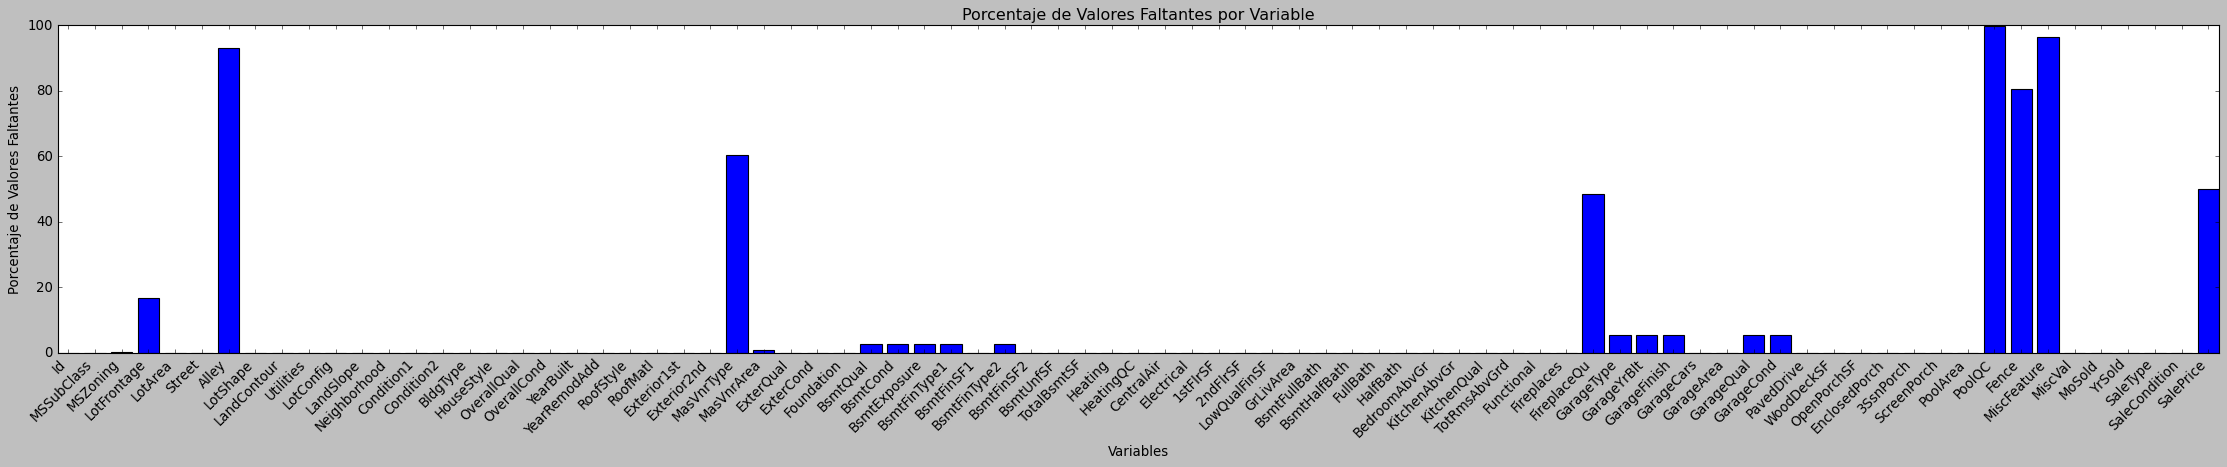

In [665]:
# Visualización de los valores faltantes por variable
plt.figure(figsize=(28, 6))
plt.bar(valores_faltantes.index, missing_values['Porcentaje'])
plt.xticks(rotation=45, ha='right')
plt.title('Porcentaje de Valores Faltantes por Variable')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de Valores Faltantes')
plt.tight_layout()
plt.show()

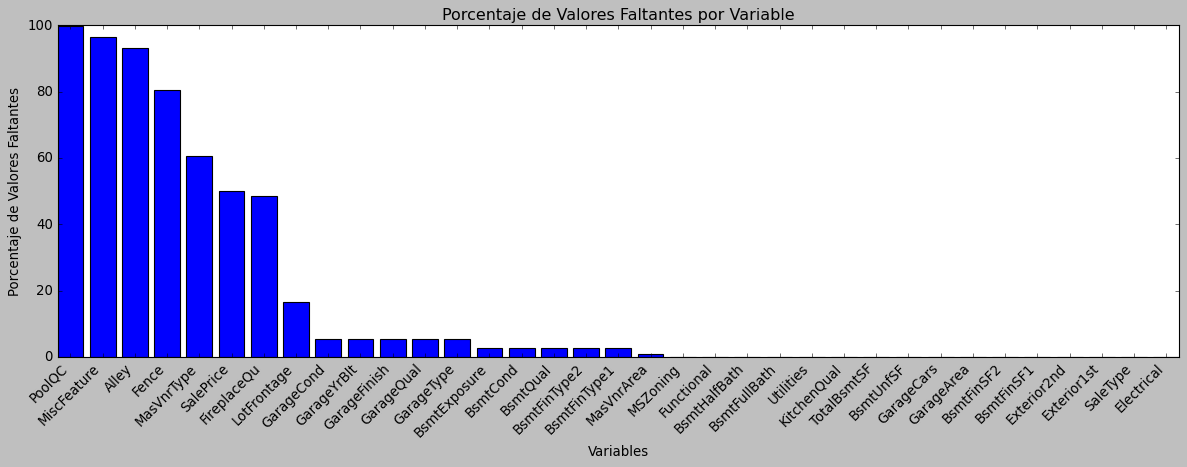

In [690]:
columnas_con_valores_faltantes = missing_values[missing_values['Valores Faltantes'] > 0].sort_values(
    'Porcentaje', ascending=False)

plt.figure(figsize=(15, 6))
# El error estaba aquí: debes usar columnas_con_valores_faltantes['Porcentaje'] en lugar de missing_values['Porcentaje']
plt.bar(columnas_con_valores_faltantes.index, columnas_con_valores_faltantes['Porcentaje'])
plt.xticks(rotation=45, ha='right')
plt.title('Porcentaje de Valores Faltantes por Variable')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de Valores Faltantes')
plt.tight_layout()
plt.show()

In [657]:
# Separar variables por porcentaje de valores faltantes
print("Variables con más del 50% de valores faltantes:")
print(missing_values[missing_values['Porcentaje'] > 50].index.tolist())

print("\nVariables con 20-50% de valores faltantes:")
print(missing_values[(missing_values['Porcentaje'] > 20) & 
                    (missing_values['Porcentaje'] <= 50)].index.tolist())

print("\nVariables con menos del 20% de valores faltantes:")
print(missing_values[missing_values['Porcentaje'] <= 20].index.tolist())

Variables con más del 50% de valores faltantes:
['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

Variables con 20-50% de valores faltantes:
['FireplaceQu', 'SalePrice']

Variables con menos del 20% de valores faltantes:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'Ga

## 4. Análisis de la variable objetivo (SalePrice)

### 4.1 Graficamos la distribución SalePrice

C:\Users\34665\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


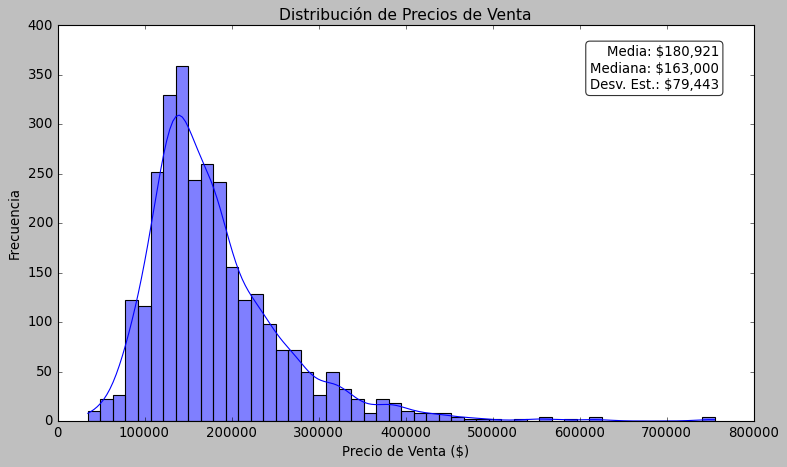


Asimetría: 1.88
Curtosis: 6.54


In [608]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))

# Histograma con distribución normal superpuesta
sns.histplot(data=df, x='SalePrice', bins=50, kde=True)
plt.title('Distribución de Precios de Venta', fontsize=14)
plt.xlabel('Precio de Venta ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

stats = f'Media: ${df.SalePrice.mean():,.0f}\n'
stats += f'Mediana: ${df.SalePrice.median():,.0f}\n'
stats += f'Desv. Est.: ${df.SalePrice.std():,.0f}'

plt.text(0.95, 0.95, stats,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

print(f"\nAsimetría: {df.SalePrice.skew():.2f}")
print(f"Curtosis: {df.SalePrice.kurtosis():.2f}")

Observaciones:

- Una distribución **asimétrica positiva** o también llamada **sesgada a la derecha** (media > mediana) esto significa que la mayoría de las casas se concentran en los precios más bajos (entre 100,000 y 200,000)
- La curva de densidad (línea azul) nos indica que hay una alta concentración de ventas en ese rango de precios
- Algunos valores atípicos en los precios más altos. Podemos afirmar que no resulta común casas por encima de los 400,000$
- Una concentración de valores en los rangos de precios más bajos
- El pico más alto está alrededor de los 140,000-160,000 indicando que este es el rango de precio más común
- La frecuencia disminuye rápidamente después de los 300,000
- Hay muy pocas casas con precios superiores a 500,000


**Media**: $180,921 - este valor es mayor que la mediana debido a la asimetría

**Mediana**: $163,000 - el 50% de las casas están por debajo de este precio

**Desviación estándar**: $79,443 - indica qué tan dispersos o "esparcidos" están los datos con respecto a la media. Tiene un valor elevando ya que hay mucha variedad de precios distintos

Distribución de precios por segmento:

                         Cantidad  Porcentaje
Segmento_Precio                             
Bajo (<100k)                 114        3.91
Medio-Bajo (100k-200k)       911       31.21
Medio (200k-300k)            320       10.96
Medio-Alto (300k-400k)        87        2.98
Alto (>400k)                  28        0.96 



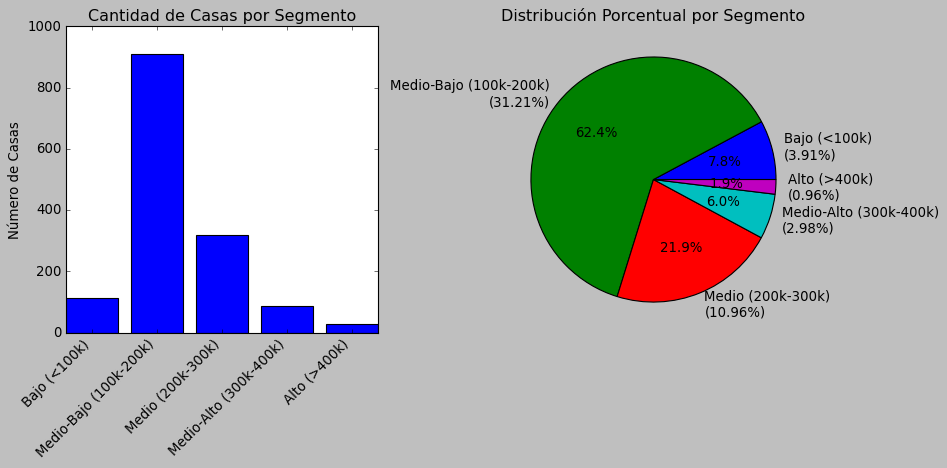

In [746]:
# Segmentación de precios por rangos
rangos = [0, 100000, 200000, 300000, 400000, float('inf')]
etiquetas = ['Bajo (<100k)', 'Medio-Bajo (100k-200k)', 'Medio (200k-300k)', 
             'Medio-Alto (300k-400k)', 'Alto (>400k)']

df['Segmento_Precio'] = pd.cut(df['SalePrice'], bins=rangos, labels=etiquetas, right=False)

segmentacion = df['Segmento_Precio'].value_counts().sort_index()
porcentajes = (segmentacion / len(df) * 100).round(2)

resultados = pd.DataFrame({
    'Cantidad': segmentacion,
    'Porcentaje': porcentajes
})

print("Distribución de precios por segmento:")
print(f"\n {resultados} \n")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(resultados.index, resultados['Cantidad'])
plt.title('Cantidad de Casas por Segmento')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de Casas')

# Gráfico de pastel
plt.subplot(1, 2, 2)
plt.pie(resultados['Porcentaje'], labels=[f'{idx}\n({val}%)' 
        for idx, val in zip(resultados.index, resultados['Porcentaje'])],
        autopct='%1.1f%%')
plt.title('Distribución Porcentual por Segmento')

plt.tight_layout()
plt.show()

### 4.2 Identificación de valores atípicos en SalePrice

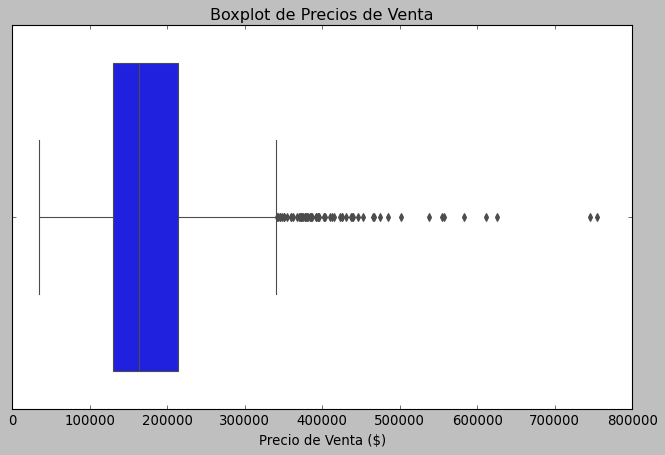

In [610]:
# Bloxplot de los valores atípicos para SalesPrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot de Precios de Venta')
plt.xlabel('Precio de Venta ($)')
plt.show()

In [624]:
#  Cálculo de valores atípicos usando el método IQR
Q1 = df.SalePrice.quantile(0.25)
Mediana = df.SalePrice.quantile(0.5)
Q3 = df.SalePrice.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = df[(df['SalePrice'] < limite_inferior) | (df['SalePrice'] > limite_superior)]

print("\nEstadísticas de valores atípicos:")
print(f"Primer cuartil (Q1): ${Q1:,.2f}")
print(f"Línea central (Mediana): ${Mediana:,.2f}")
print(f"Tercer cuartil (Q3): ${Q3:,.2f}")
print("-------")
print(f"Bigote del límite inferior: ${limite_inferior:,.2f}")
print(f"Bigote del límite superior: ${limite_superior:,.2f}")
print("-------")
print(f"Número de valores atípicos: {len(valores_atipicos)}")
print(f"Porcentaje de valores atípicos: {(len(valores_atipicos)/len(df))*100:.2f}%")


Estadísticas de valores atípicos:
Primer cuartil (Q1): $129,975.00
Línea central (Mediana): $163,000.00
Tercer cuartil (Q3): $214,000.00
-------
Bigote del límite inferior: $3,937.50
Bigote del límite superior: $340,037.50
-------
Número de valores atípicos: 61
Porcentaje de valores atípicos: 2.09%


- La mayoría de las casas se venden entre 129,975 y 214,000

- Los valores atípicos probablemente representan: Casas de lujo

In [556]:
# Mostrar los valores atípicos más extremos
print("Los 10 precios más altos:")
scroll_box(df.nlargest(10, 'SalePrice')[['SalePrice']].to_html(), 100)

print("Los 10 precios más bajos:")
scroll_box(df.nsmallest(10, 'SalePrice')[['SalePrice']].to_html(),100)

Los 10 precios más altos:


,SalePrice
691,755000.0
1182,745000.0
1169,625000.0
898,611657.0
803,582933.0
1046,556581.0
440,555000.0
769,538000.0
178,501837.0
798,485000.0


Los 10 precios más bajos:


,SalePrice
495,34900.0
916,35311.0
968,37900.0
533,39300.0
30,40000.0
710,52000.0
1337,52500.0
705,55000.0
1325,55000.0
812,55993.0


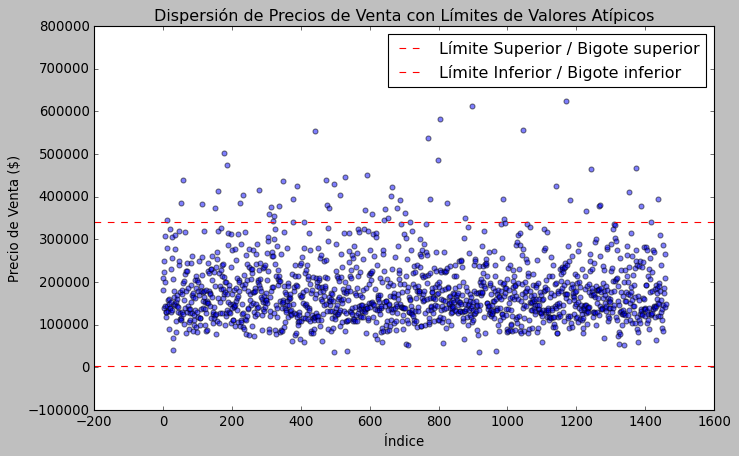

In [860]:
# Gráfico de dispersión con límites
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df['SalePrice'])), df['SalePrice'], alpha=0.5)
plt.axhline(y=limite_superior, color='r', linestyle='--', label='Límite Superior / Bigote superior')
plt.axhline(y=limite_inferior, color='r', linestyle='--', label='Límite Inferior / Bigote inferior')
plt.title('Dispersión de Precios de Venta con Límites de Valores Atípicos')
plt.ylabel('Precio de Venta ($)')
plt.xlabel('Índice')
plt.legend()
plt.show()

**Distribución general:**

- La mayoría de los precios se concentran entre 100,000 dólares y 200,000 dólares
- Hay una banda clara de precios "normales" que forma el grueso de los datos
- Los datos muestran una dispersión bastante consistente a lo largo de todo el índice
  
**Valores atípicos:**

- El límite superior (línea roja punteada) está aproximadamente en 340,000 dólares
- El límite inferior (línea roja punteada) está cerca de 0 dólares
- Hay varios valores atípicos por encima del límite superior
- El valor más extremo está cerca de 750,000 dólares
- No hay prácticamente valores atípicos por debajo del límite inferior

### 4.3 Valorar si es necesario aplicar una transformación

In [705]:
print(f"Diferencia Q3-Mediana: ${Q3-Mediana:,.2f}")
print(f"Diferencia Mediana-Q1: ${Mediana-Q1:,.2f}")

Diferencia Q3-Mediana: $51,000.00
Diferencia Mediana-Q1: $33,025.00


La diferencia entre Q3-Mediana (51,000) es mayor que la diferencia entre Mediana-Q1 (33,025) entonces indica una asimetría positiva. Además lo hemos graficado anteriormente.

La asimetría de los datos puede afectar a nuestra precisión de los análisis, una buena forma de corregir esta asímetria sería aplicando una **Transformación**, o aplicando otros métodos como **Winsorización** (reemplazar valores extremos por menos extremos), **Extracción atípica** (Eliminar valores atípicos puede ayudar a corregir la asimetría en la distribución, Sin embargo, es importante tener cuidado al eliminar los valores atípicos, ya que puede conducir a la  pérdida de información,Sin embargo, es importante tener cuidado al eliminar los valores atípicos, ya que puede conducir a la pérdida de información) o **Binning** (método para agrupar datos en contenedores o categorías)

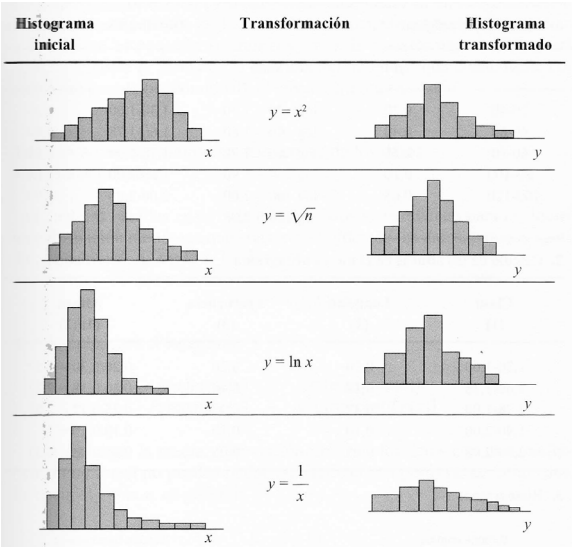

C:\Users\34665\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34665\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34665\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


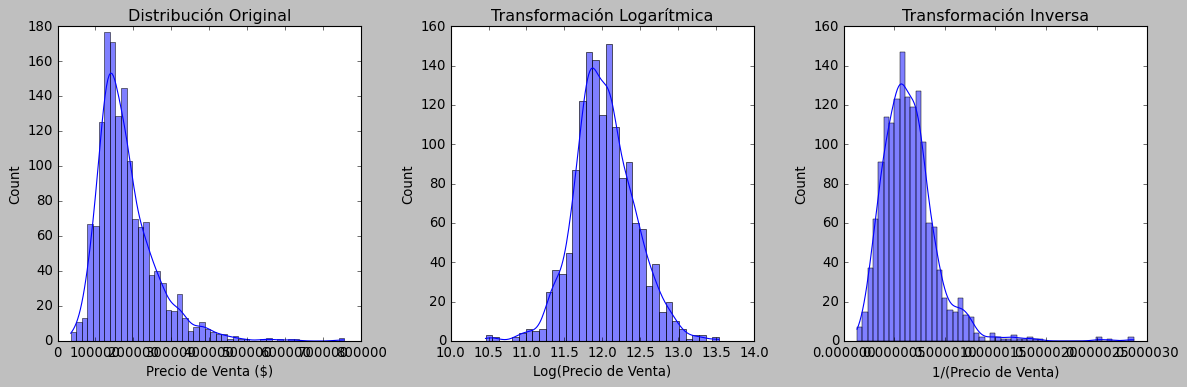

In [866]:
# Crear una figura con tres subplots
plt.figure(figsize=(15, 5))

# Distribución original
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='SalePrice', kde=True)
plt.title('Distribución Original')
plt.xlabel('Precio de Venta ($)')

# Transformación logarítmica
plt.subplot(1, 3, 2)
sns.histplot(data=df, x=np.log(df['SalePrice']), kde=True)
plt.title('Transformación Logarítmica')
plt.xlabel('Log(Precio de Venta)')

# Transformación inversa (1/x)
plt.subplot(1, 3, 3)
sns.histplot(data=df, x=1/df['SalePrice'], kde=True)
plt.title('Transformación Inversa')
plt.xlabel('1/(Precio de Venta)')

plt.tight_layout()
plt.show()

In [1085]:
# Mostrar estadísticas de asimetría y curtosis para cada transformación
print("\nEstadísticas de asimetría y curtosis:")
print("\nOriginal:")
print(f"Asimetría: {df['SalePrice'].skew():.3f}")
print(f"Curtosis: {df['SalePrice'].kurtosis():.3f}")

print("\nLogarítmica:")
print(f"Asimetría: {np.log(df['SalePrice']).skew():.3f}")
print(f"Curtosis: {np.log(df['SalePrice']).kurtosis():.3f}")

print("\nTransformación Inversa:")
print(f"Asimetría: {np.sqrt(df['SalePrice']).skew():.3f}")
print(f"Curtosis: {np.sqrt(df['SalePrice']).kurtosis():.3f}")


Estadísticas de asimetría y curtosis:

Original:
Asimetría: 1.883
Curtosis: 6.536

Logarítmica:
Asimetría: 0.121
Curtosis: 0.810

Transformación Inversa:
Asimetría: 0.943
Curtosis: 1.958


Teniendo en cuenta estos valores de referencia:

**Curtosis**

value < 3 -> Platicúrtica

value == 3 -> Normal

value > 3 -> Leptocúrtica

**Asímetria**

[0, 0.5] -> Baja

[0.5,1] -> Moderada

[1,2] -> Alta

[,>2] -> Extrema

Por esto la transformación logarítmica es la mejor:

- Reduce la asimetría de ALTA (1.883) a BAJA (0.121)
- Mejora la curtosis de ALTA (6.536) a ACEPTABLE (0.810)

## 5. Análisis de características individuales

### 5.1 Variables numéricas

In [ ]:
df = df.reset_index(drop=True)

numericas = df.select_dtypes(include=['int64', 'float64']).columns
numericas = numericas.drop(['Id']) if 'Id' in numericas else numericas

In [810]:
# Estadísticas de variables numéricas:
def analizar_variables_numericas(df, numericas):
    stats_dict = {
        'asimetria': df[numericas].skew(),
        'curtosis': df[numericas].kurtosis(),
        'nulos': df[numericas].isnull().sum(),
        'nulos_pct': (df[numericas].isnull().sum() / len(df) * 100).round(2)
    }
    return pd.DataFrame(stats_dict)
    
stats = analizar_variables_numericas(df, numericas)
scroll_box(stats.to_html())

,asimetria,curtosis,nulos,nulos_pct
MSSubClass,1.376165,1.457827,0,0.00
LotFrontage,1.503278,11.295921,486,16.65
LotArea,12.829025,264.952310,0,0.00
OverallQual,0.197212,0.067219,0,0.00
OverallCond,0.570605,1.479447,0,0.00
YearBuilt,-0.600114,-0.511317,0,0.00
YearRemodAdd,-0.451252,-1.346431,0,0.00
MasVnrArea,2.602589,9.254343,23,0.79
BsmtFinSF1,1.425722,6.904832,1,0.03
BsmtFinSF2,4.147456,18.836540,1,0.03


#### Análisis de Correlaciones con el Precio de Venta

En este análisis, estudiamos cómo las diferentes variables numéricas se relacionan con el precio de venta de las casas. Para ello, utilizamos el coeficiente de correlación, que nos indica la fuerza y dirección de la relación entre variables.

**Correlación**

- La correlación es un valor entre -1 y 1 que indica:
  * **1**: Correlación positiva perfecta (cuando una variable sube, la otra sube proporcionalmente)
  * **0**: No hay correlación (no hay relación lineal entre las variables)
  * **-1**: Correlación negativa perfecta (cuando una variable sube, la otra baja proporcionalmente)

**Interpretación de los Valores**

| Valor de Correlación | Interpretación |
|---------------------|----------------|
| 0.7 a 1.0 | Correlación fuerte positiva |
| 0.3 a 0.7 | Correlación moderada positiva |
| -0.3 a 0.3 | Correlación débil o nula |
| -0.7 a -0.3 | Correlación moderada negativa |
| -1.0 a -0.7 | Correlación fuerte negativa |

In [812]:
# Correlaciones con SalePrice ordenadas
def analizar_correlaciones(df, numericas):
    correlaciones = df[numericas].corr()['SalePrice']
    return pd.DataFrame(correlaciones.sort_values(ascending=False))
    
scroll_box(correlaciones.to_html())

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [971]:
print("Variables más correlacionadas con SalePrice (correlación > 0.5):")
# Primero filtrar por correlación
variables_numericas_significativas = correlaciones[abs(correlaciones['SalePrice']) > 0.5]
# Luego eliminar SalePrice
variables_numericas_significativas = variables_numericas_significativas.drop('SalePrice', errors='ignore')
print(f"\n{variables_numericas_significativas}")

Variables más correlacionadas con SalePrice (correlación > 0.5):

              SalePrice
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
TotRmsAbvGrd   0.533723
YearBuilt      0.522897
YearRemodAdd   0.507101


**Correlaciones Muy Fuertes (> 0.7):**

- OverallQual (0.79): Calidad general de la casa -> Indica que la calidad es el factor más importante en el precio
- GrLivArea (0.71): Área habitable sobre el suelo -> El tamaño habitable impacta fuertemente en el precio

**Correlaciones Fuertes (0.6 - 0.7):**

- GarageCars (0.64): Capacidad del garaje -> ...
- GarageArea (0.62): Área del garaje
- TotalBsmtSF (0.61): Área total del sótano
- 1stFlrSF (0.61): Área del primer piso

**Correlaciones Moderadas (0.5 - 0.6)**

- FullBath (0.56): Baños completos
- TotRmsAbvGrd (0.53): Total de habitaciones sobre el suelo
- YearBuilt (0.52): Año de construcción
- YearRemodAdd (0.51): Año de remodelación

**Conclusiones**

La calidad de la casa y el tamaño es lo que más impacta en el precio, seguido de la cantidad de plazs de garaje y el tamaño de este y lo mismo para el sótano y el tamaño del primer piso. Después sería relevante los baños completos, el total de habitaciones, el año en el que está contruida y el año de remodelación ya que las casas nuevas o reformadas tienden a valer más

In [1015]:
# Cálculo de la asímetria
asimetria = df[numericas].skew()
variables_asimetricas = asimetria[abs(asimetria) > 1].sort_values(ascending=False)

tabla_asimetria = pd.DataFrame({
    'Variable': variables_asimetricas.index,
    'Descripción': [variables_dict.get(var, 'Descripción no disponible') for var in variables_asimetricas.index],
    'Asimetría': variables_asimetricas.values
})

tabla_asimetria['Asimetría'] = tabla_asimetria['Asimetría'].round(3)

print("Variables con alta asimetría (asimetría > 1):\n")
tabla_asimetria


Variables con alta asimetría (asimetría > 1):



,Variable,Descripción,Asimetría
0,MiscVal,Valor en $ de la característica miscelánea,21.958
1,PoolArea,Área de la piscina en pies cuadrados,16.907
2,LotArea,Tamaño del lote en pies cuadrados,12.829
3,LowQualFinSF,Pies cuadrados terminados de baja calidad (tod...,12.095
4,3SsnPorch,Área de porche de tres estaciones en pies cuad...,11.382
5,KitchenAbvGr,Descripción no disponible,4.304
6,BsmtFinSF2,Pies cuadrados terminados de tipo 2,4.147
7,EnclosedPorch,Área de porche cerrado en pies cuadrados,4.006
8,ScreenPorch,Área de porche con mosquitero en pies cuadrados,3.949
9,BsmtHalfBath,Medios baños en el sótano,3.932


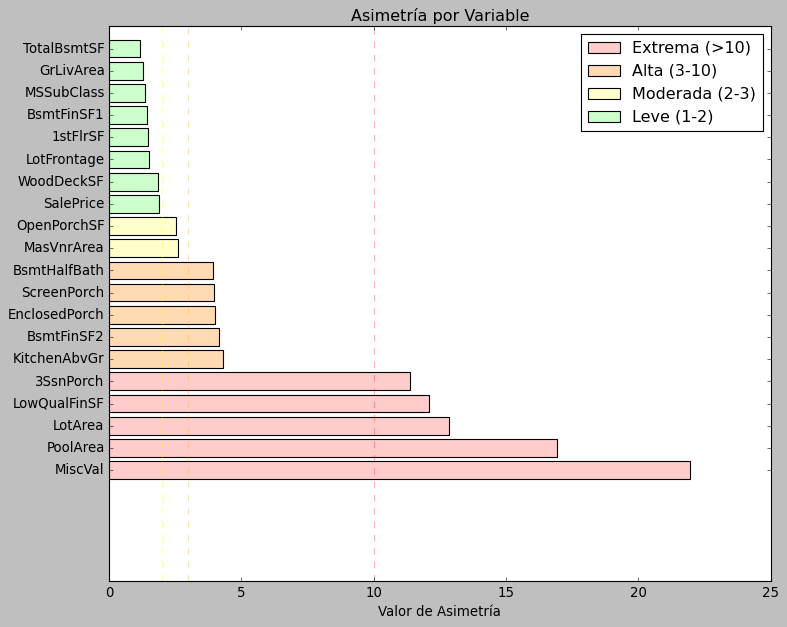

In [844]:
def plot_asimetria_variables(variables_asimetricas):
    plt.figure(figsize=(10, 8))
    
    colors = ['#ffcccc' if v > 10 else '#ffdab3' if v > 3 
              else '#ffffcc' if v > 2 else '#ccffcc' 
              for v in variables_asimetricas.values]
    
    y_pos = np.arange(len(variables_asimetricas))
    plt.barh(y_pos, variables_asimetricas.values, color=colors)
    
    plt.yticks(y_pos, variables_asimetricas.index)
    plt.xlabel('Valor de Asimetría')
    plt.title('Asimetría por Variable')
    
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#ffcccc', label='Extrema (>10)'),
        Patch(facecolor='#ffdab3', label='Alta (3-10)'),
        Patch(facecolor='#ffffcc', label='Moderada (2-3)'),
        Patch(facecolor='#ccffcc', label='Leve (1-2)')
    ]
    
    plt.axvline(x=10, color='red', linestyle='--', alpha=0.3)
    plt.axvline(x=3, color='orange', linestyle='--', alpha=0.3)
    plt.axvline(x=2, color='yellow', linestyle='--', alpha=0.3)
    
    plt.legend(handles=legend_elements, loc='best')
    
    plt.tight_layout()
    plt.show()

plot_asimetria_variables(variables_asimetricas)

**Conclusiones**

Sería interesante transformar aquellas variables con una simetría extrema, alta y moderada

### 5.2 Variables categóricas

In [912]:
categoricas = df.select_dtypes(include=['object'])

In [933]:
def explorar_categoricas(df):
    categoricas = df.select_dtypes(include=['object']).columns
    
    resumen = pd.DataFrame({
        'Descripcion': [variables_dict.get(col, 'No disponible') for col in categoricas],
        'N_Categorias': [df[col].nunique() for col in categoricas],
        'N_Valores_Faltantes': df[categoricas].isnull().sum(),
    })
    
    resumen = resumen.sort_values('N_Categorias', ascending=False)
    
    return resumen
    
scroll_box(explorar_categoricas(df).to_html())

,Descripcion,N_Categorias,N_Valores_Faltantes
Neighborhood,Ubicaciones físicas dentro de los límites de la ciudad de Ames,25,0
Exterior2nd,Revestimiento exterior secundario de la casa,16,1
Exterior1st,Revestimiento exterior de la casa,15,1
SaleType,Tipo de venta,9,1
Condition1,Proximidad a la carretera principal o ferrocarril,9,0
Condition2,Proximidad a la carretera principal o ferrocarril (si hay una segunda),8,0
HouseStyle,Estilo de la vivienda,8,0
RoofMatl,Material del techo,8,0
Functional,Calificación de funcionalidad del hogar,7,2
BsmtFinType2,Calidad de la segunda área terminada del sótano (si existe),6,80


In [ ]:
# Distribución de cada variable categórica
def distribucion_categorica(df, variable):
    freq_abs = df[variable].value_counts()
    freq_rel = df[variable].value_counts(normalize=True)
    
    distribucion = pd.DataFrame({
        'Frecuencia': freq_abs,
        'Porcentaje': freq_rel * 100,
        'Porcentaje_Acumulado': freq_rel.cumsum() * 100
    })
    
    plt.figure(figsize=(12, 5))
    plt.bar(distribucion.index, distribucion['Frecuencia'])
    plt.title(f'Distribución de {variable}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
    
    return distribucion

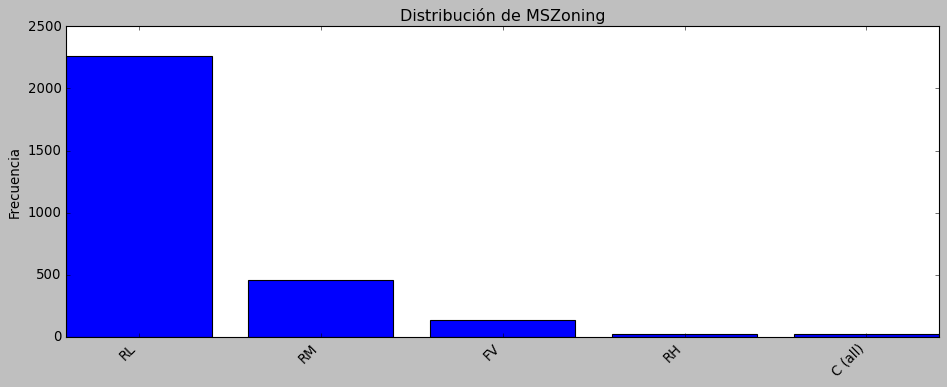

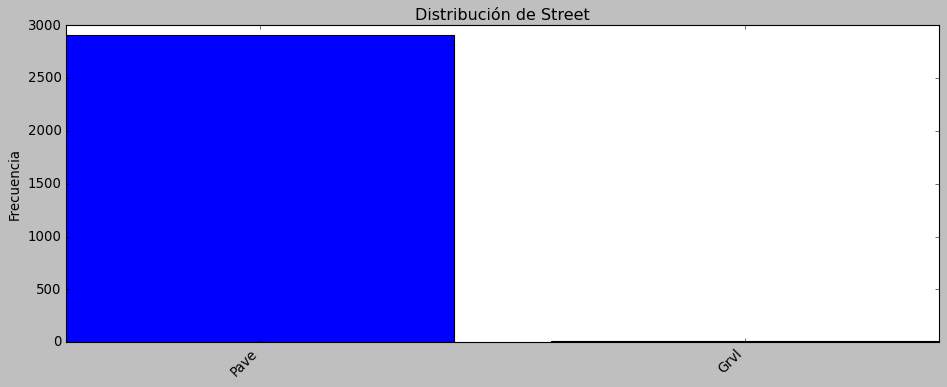

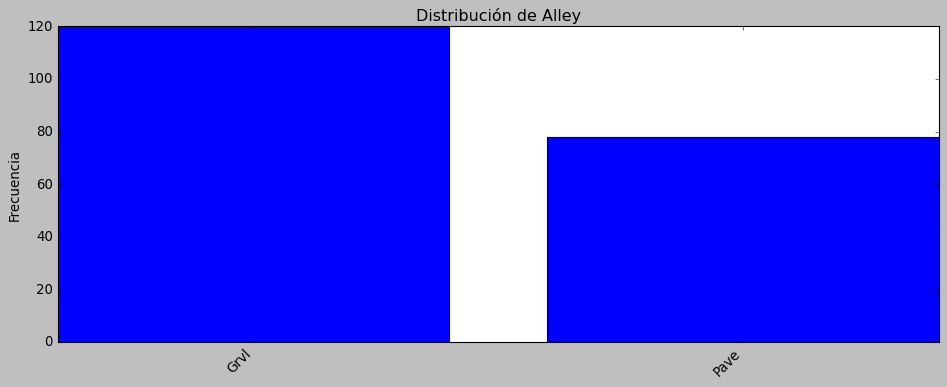

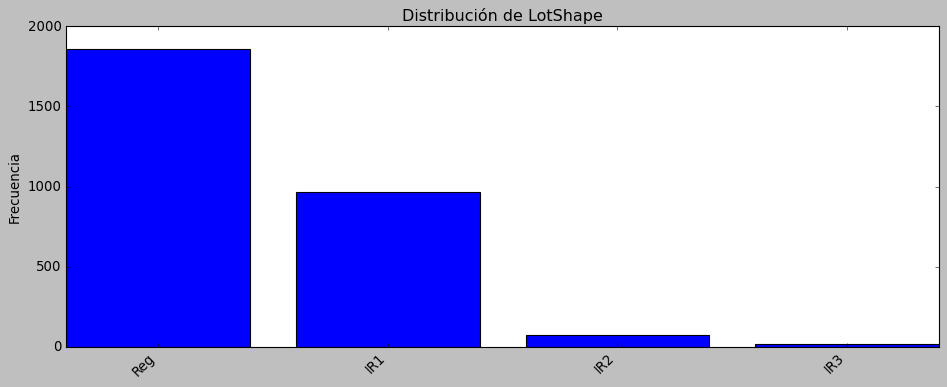

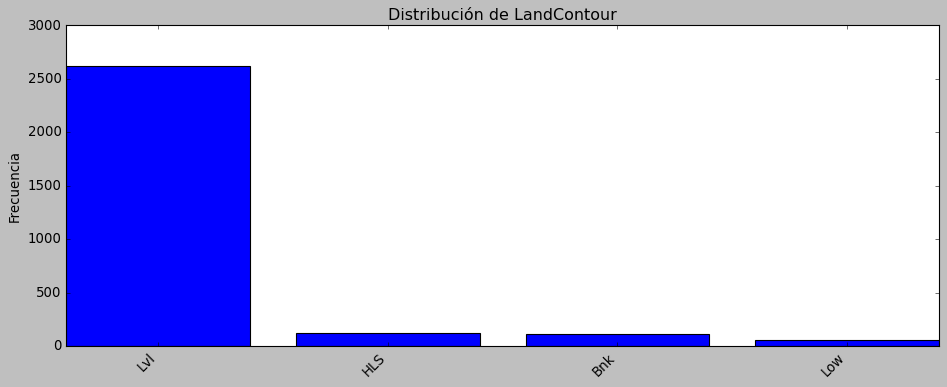

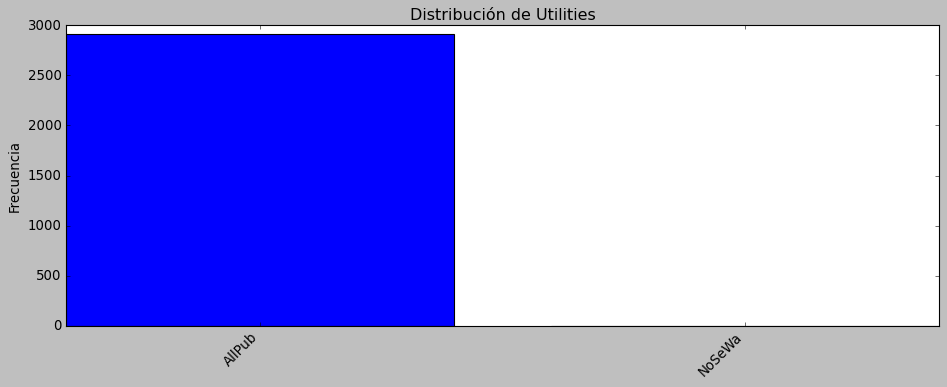

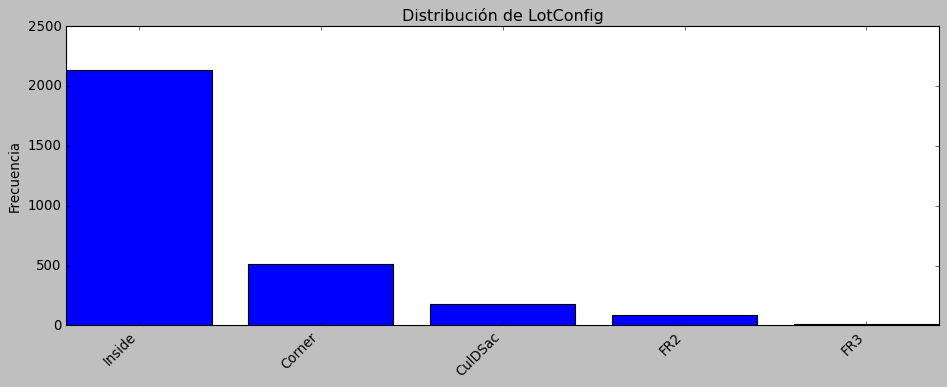

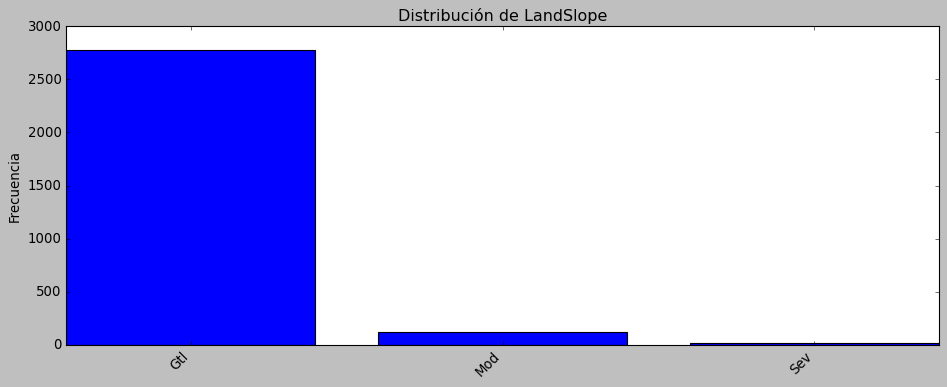

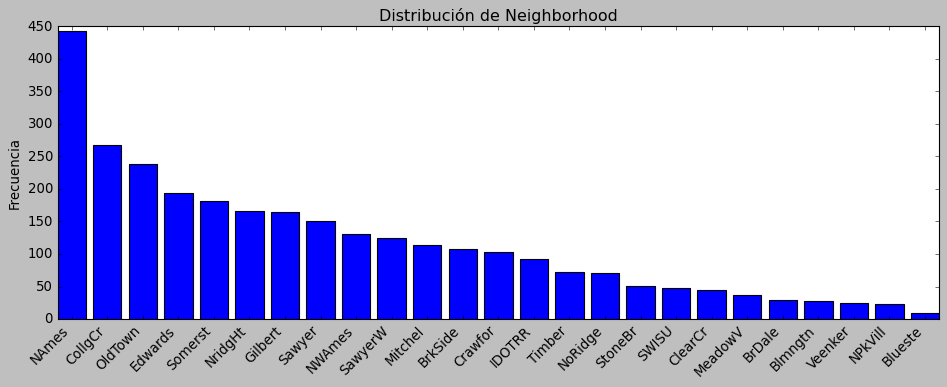

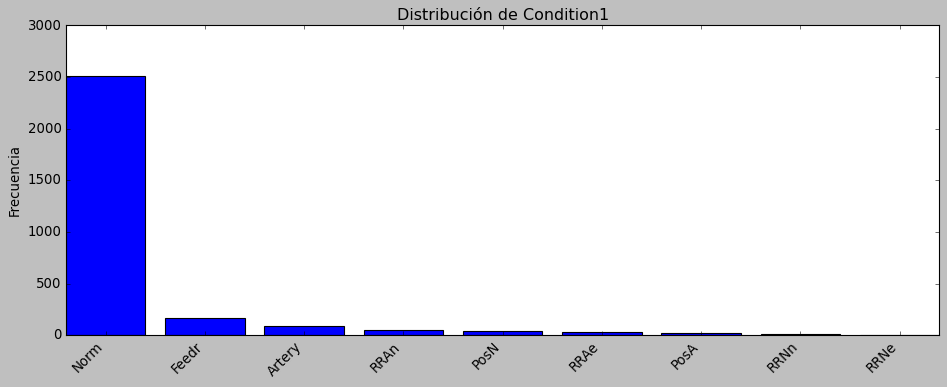

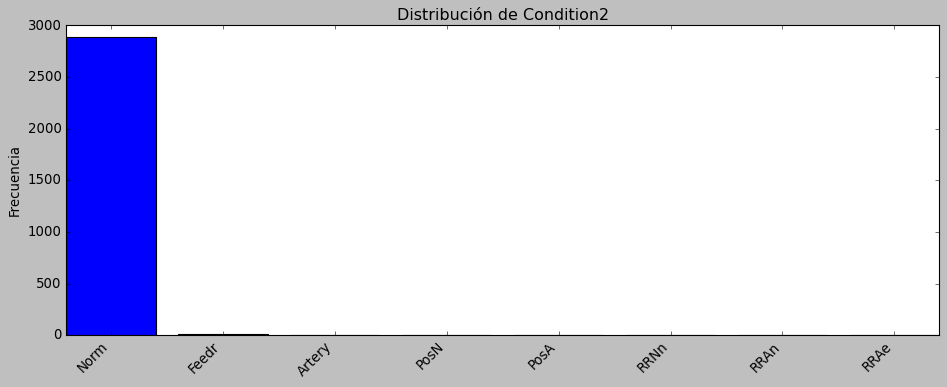

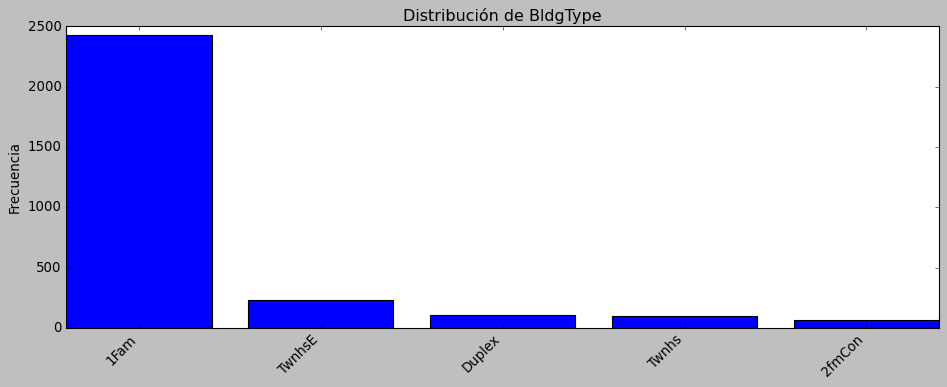

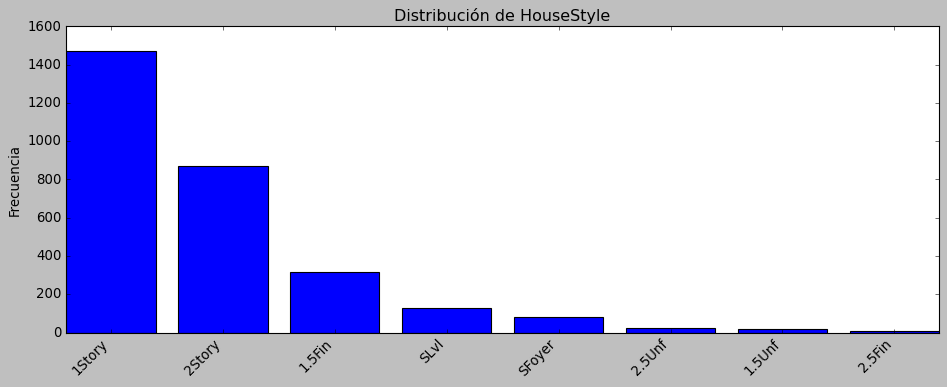

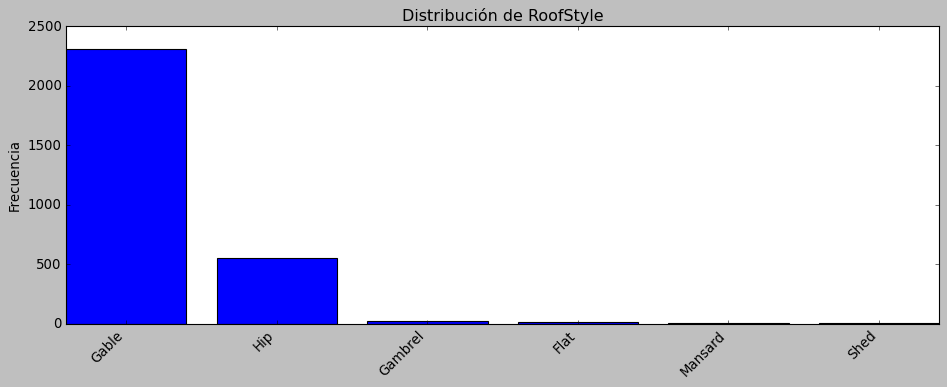

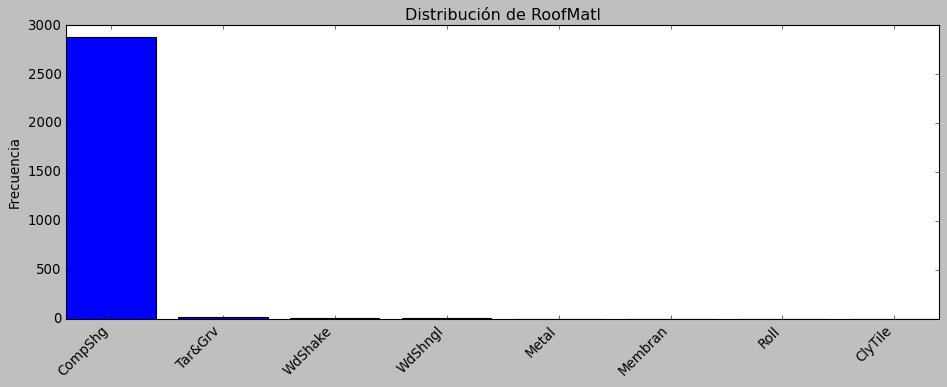

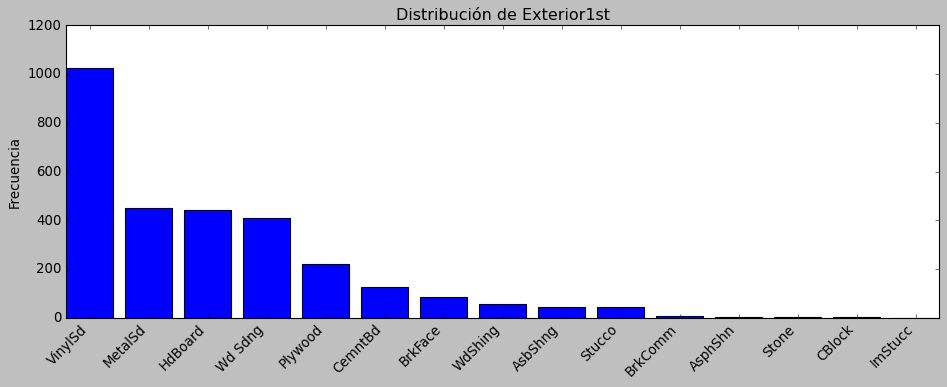

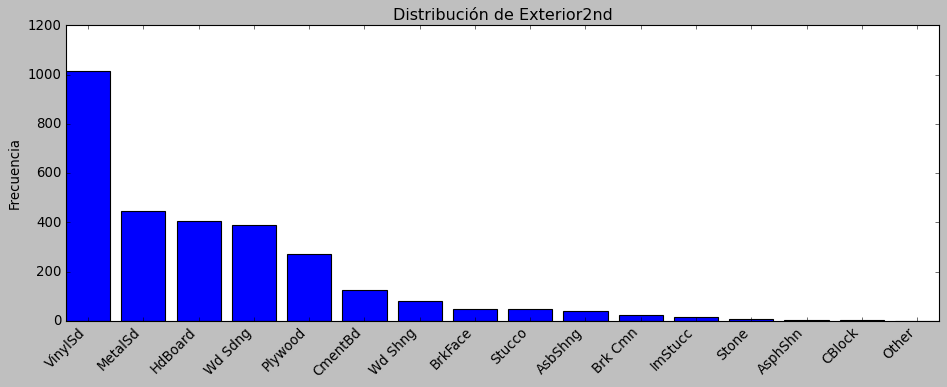

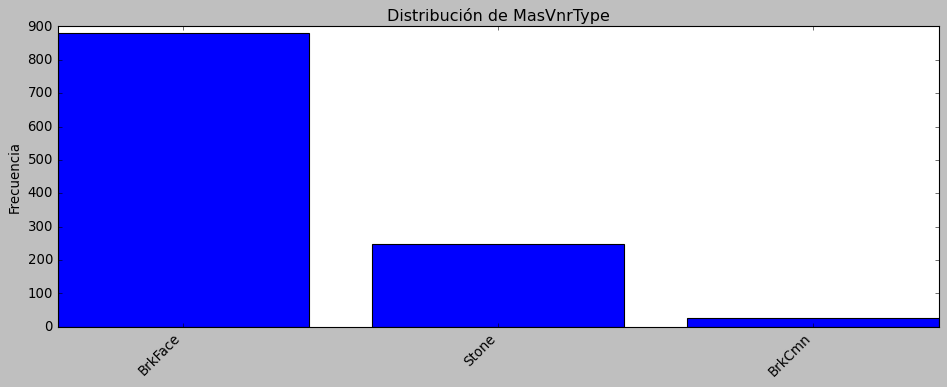

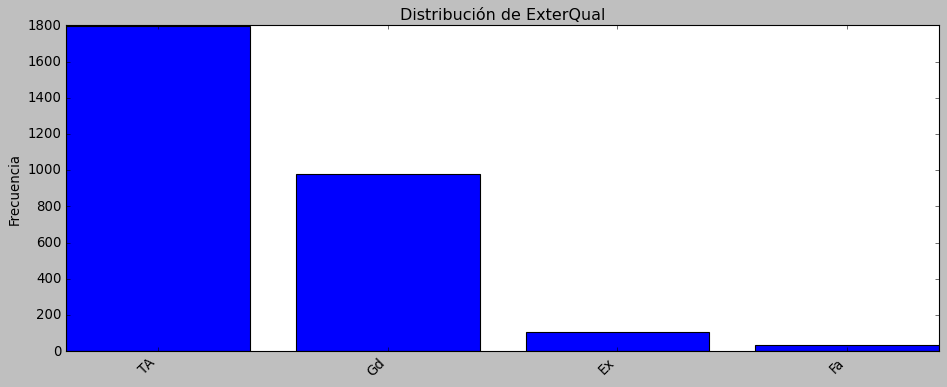

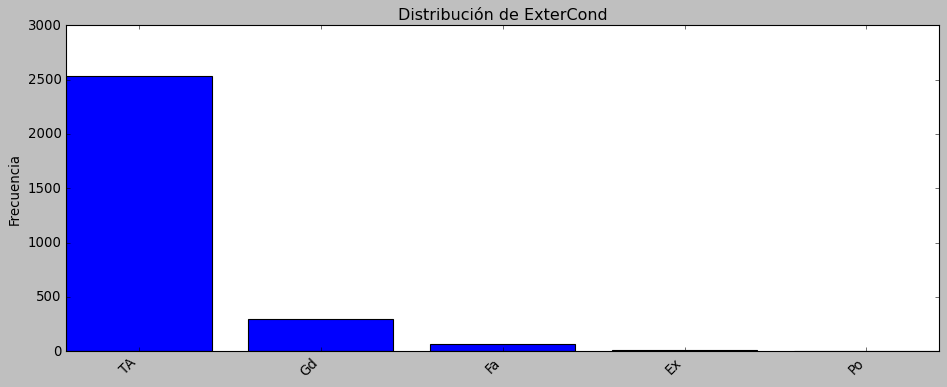

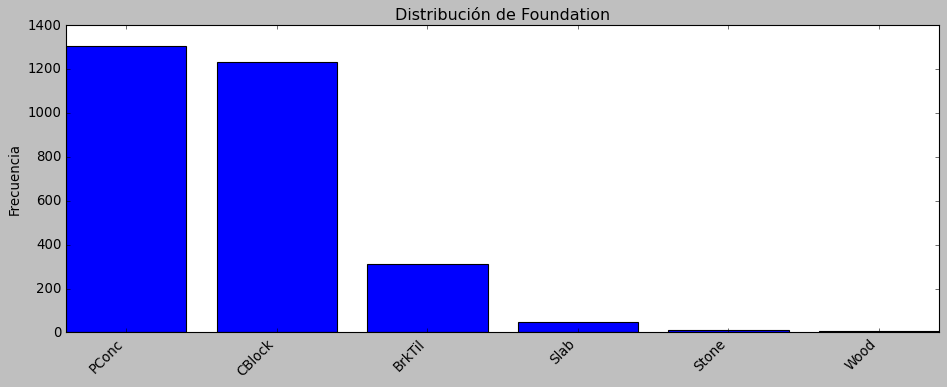

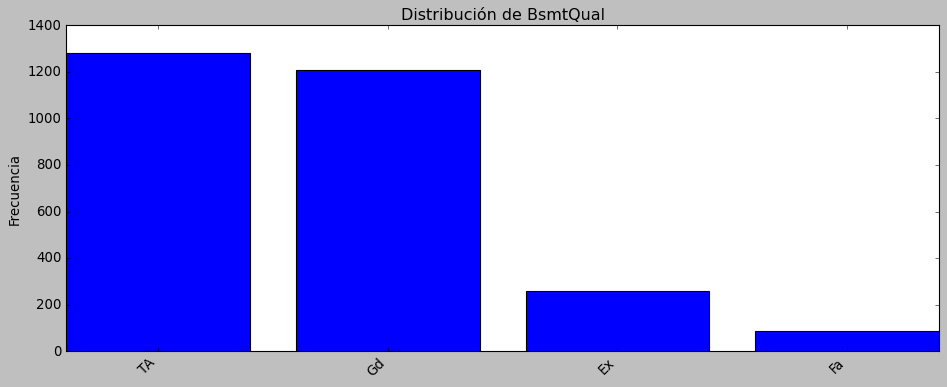

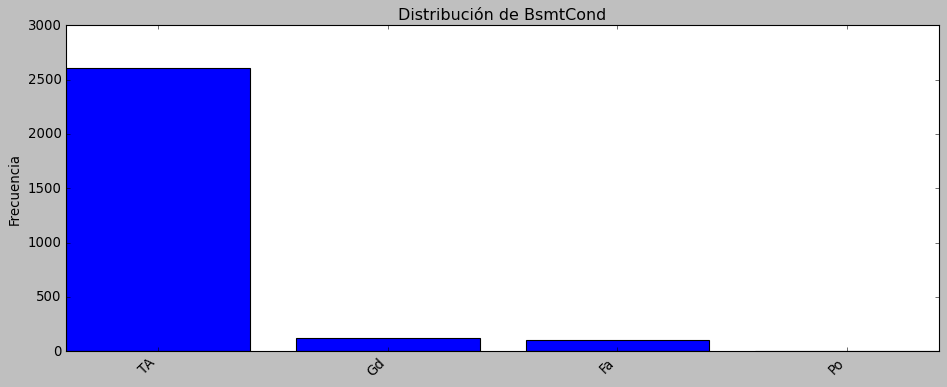

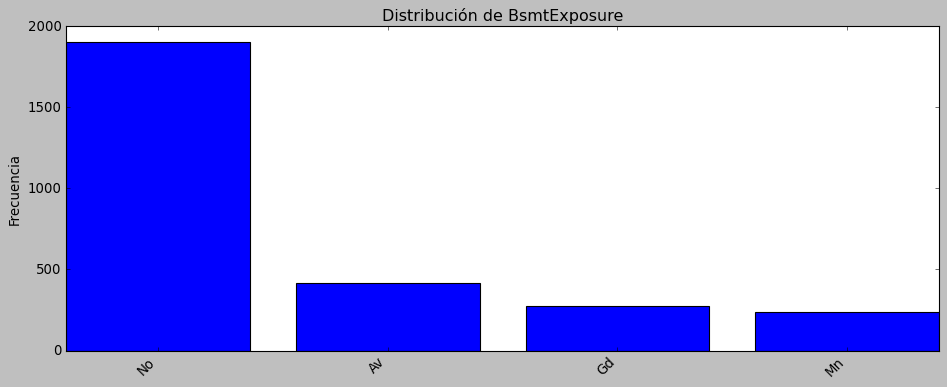

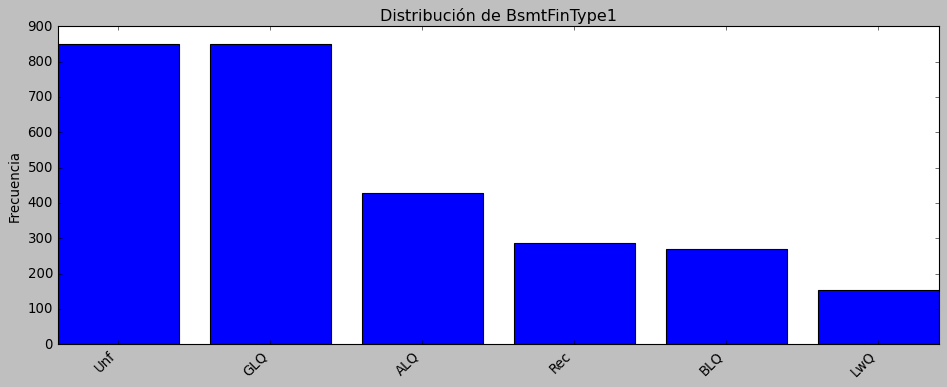

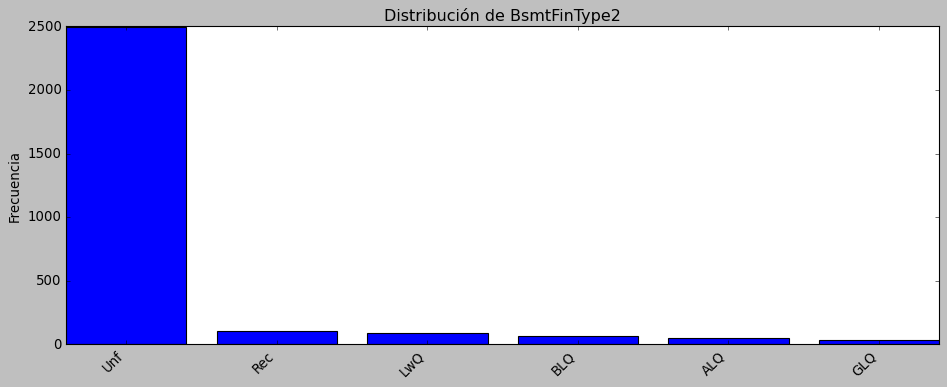

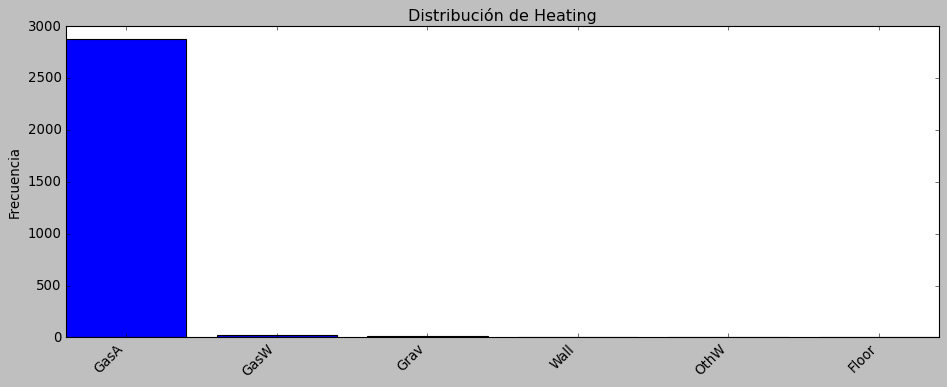

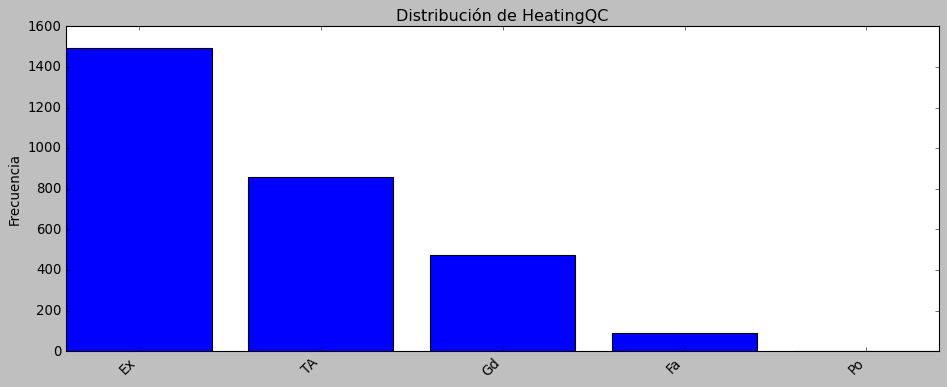

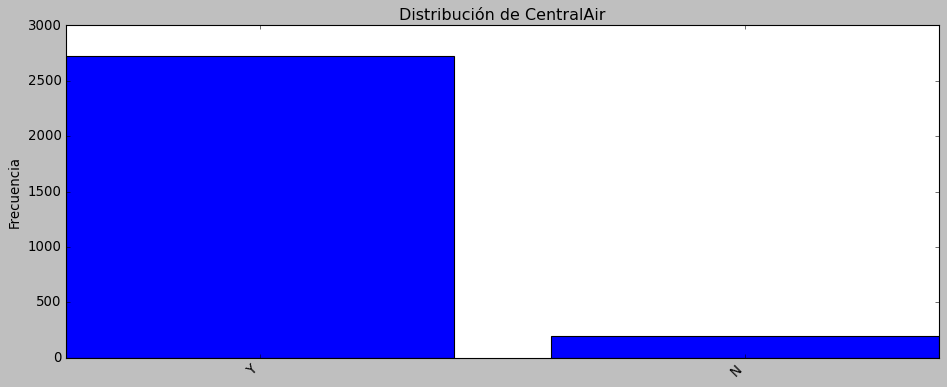

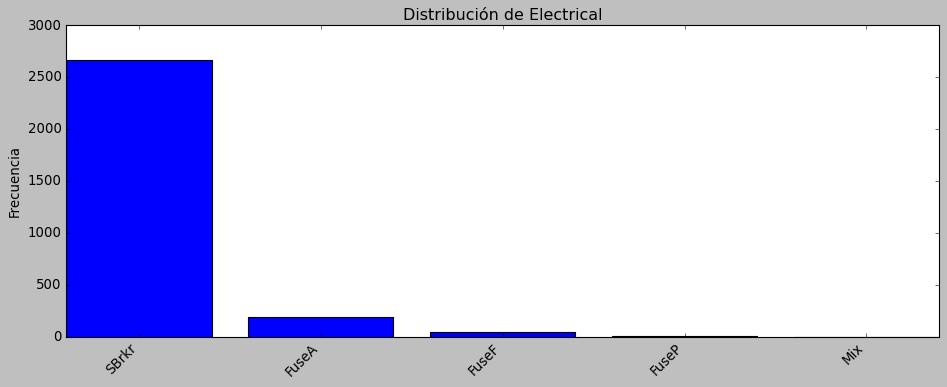

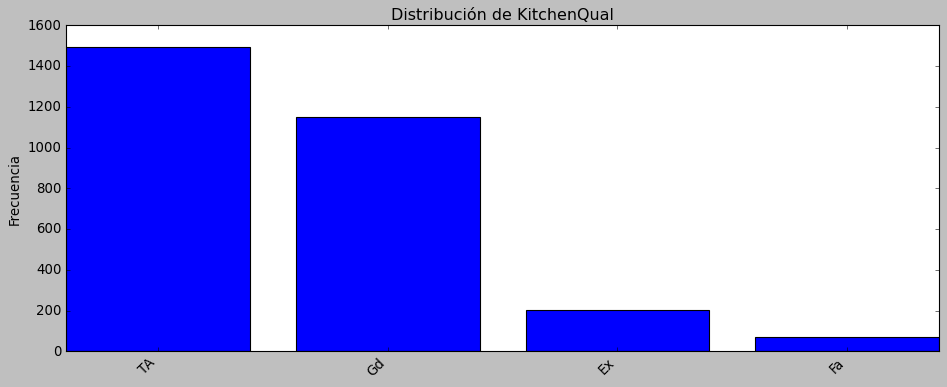

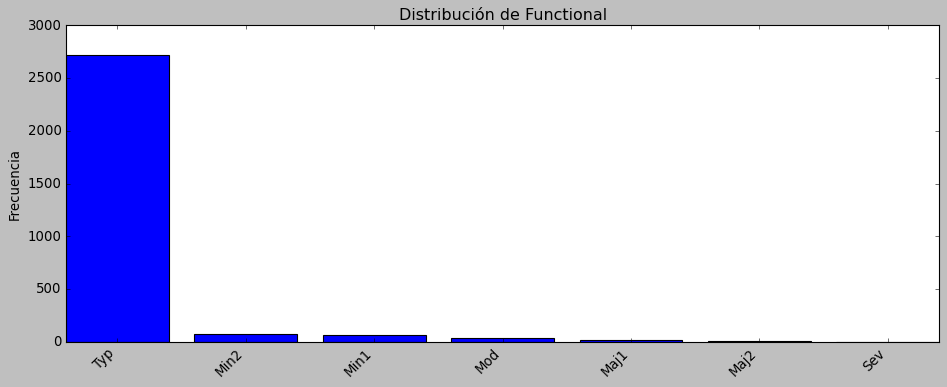

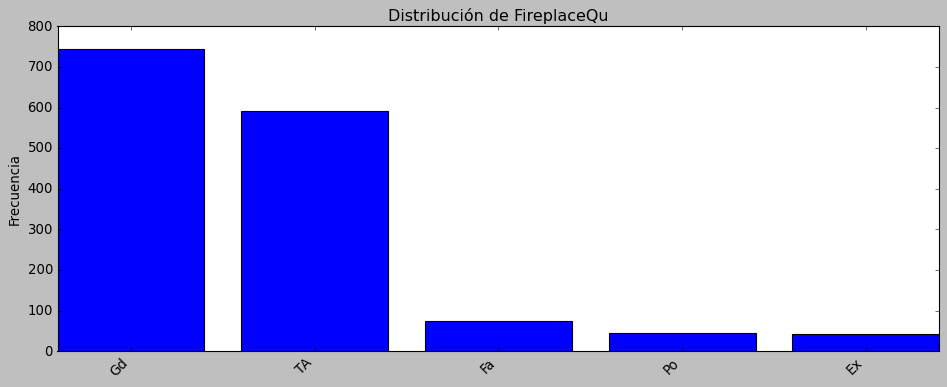

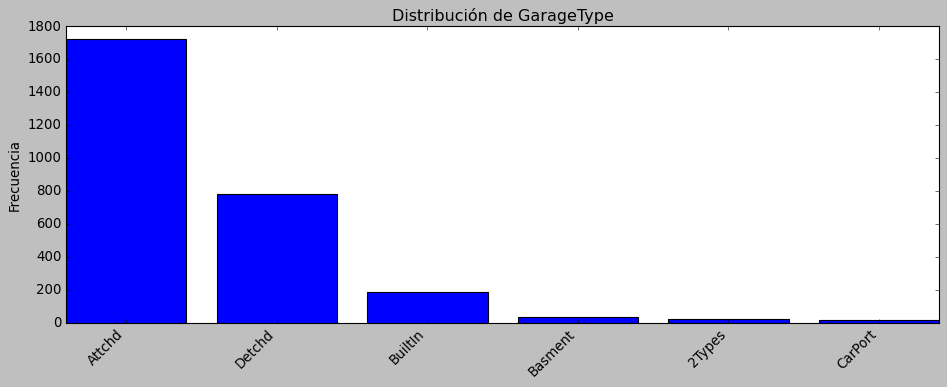

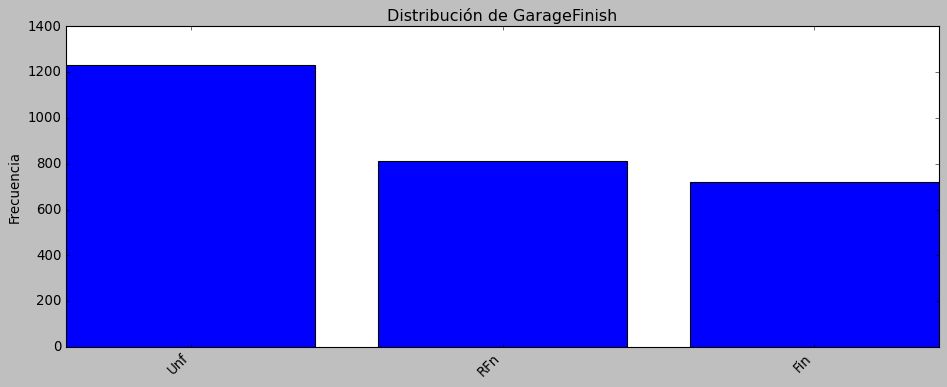

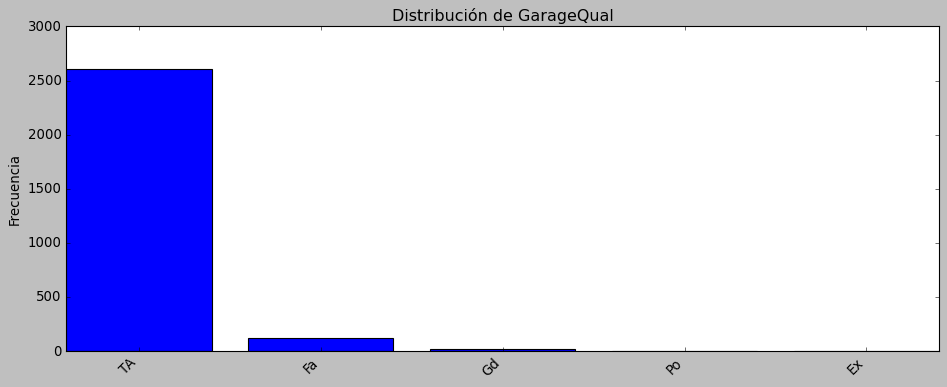

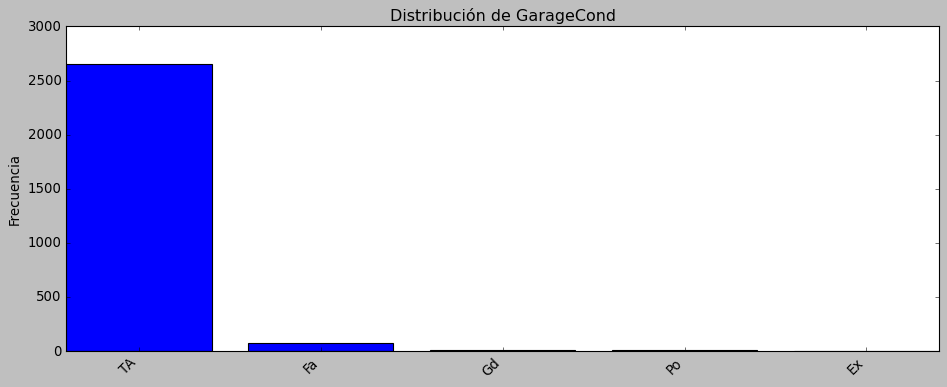

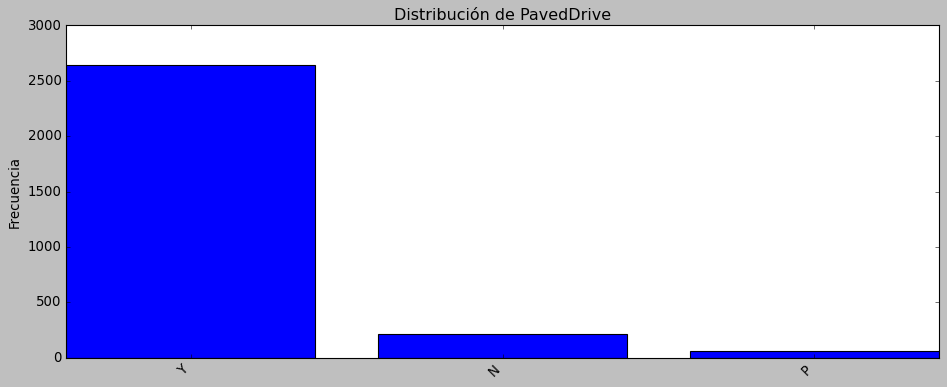

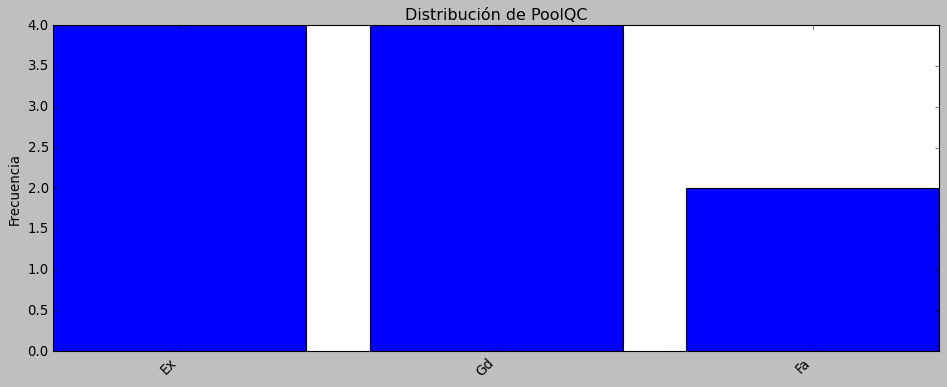

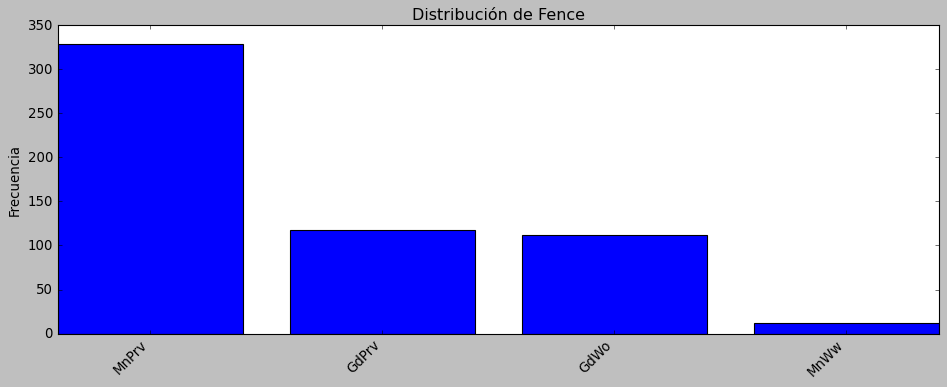

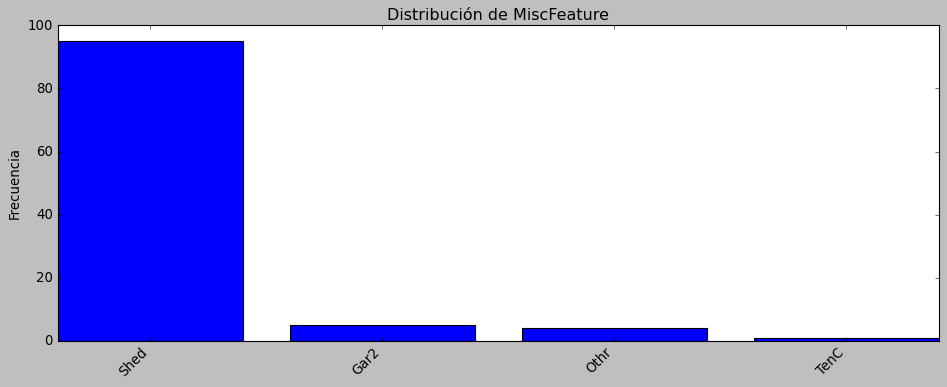

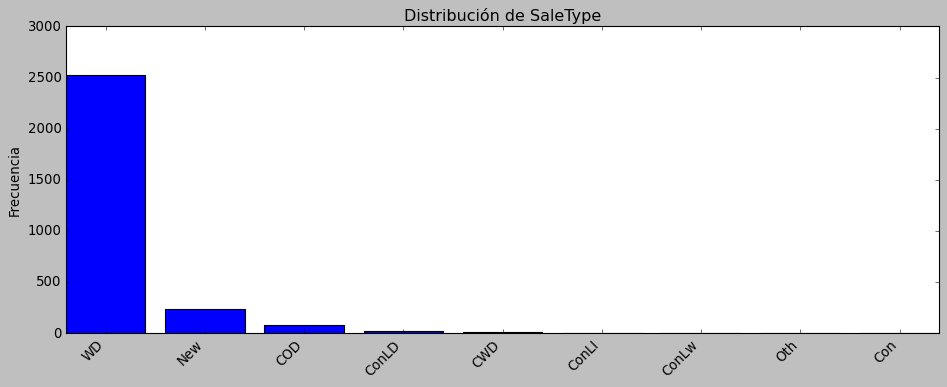

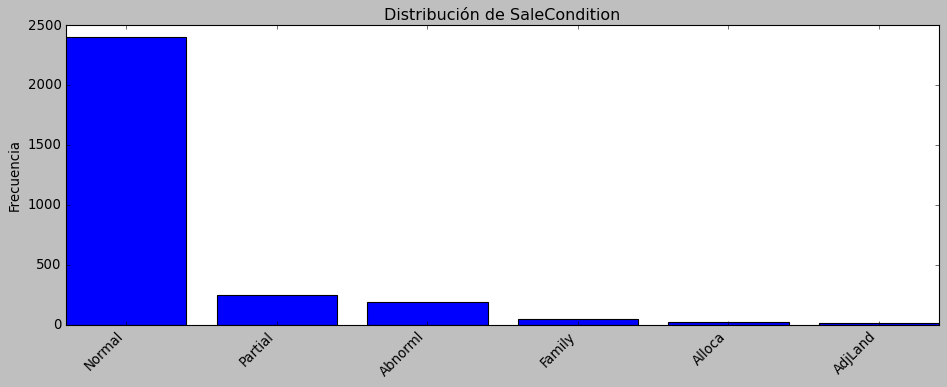

In [941]:
for categorica in categoricas:
    distribucion_categorica(df, categorica)

#### Análisis del impacto de variables categóricas en el precio
Este análisis busca entender cómo las diferentes características de una casa (por ejemplo, el barrio, el tipo de garaje, la calidad de la cocina, etc.) influyen en su precio de venta. Para ello, utilizamos las siguientes métricas:

1. **Ratio de precios**
Es una medida que compara el precio más alto con el precio más bajo dentro de una característica.
Ratio = precio más caro / Precio más barato
Cuanto mayor sea este ratio, más influencia tiene esta característica en el precio.

2. **Variabilidad**
Mide qué tan dispersos están los precios dentro de cada categoría.
Una variabilidad alta podría indicar que hay otros factores influyendo en el precio.

En definitiva:
| Nivel | Criterios | Interpretación |
|-------|-----------|----------------|
| MUY SIGNIFICATIVO | Ratio > 2 y Variabilidad ≤ 50% | La característica tiene una gran influencia en el precio y los precios son consistentes |
| MODERADO | Ratio > 1.5 y Variabilidad ≤ 50% | Tiene una influencia media y precios consistentes |
| BAJO | Ratio ≤ 1.5 o Variabilidad > 50% | Tiene poca influencia o los precios son muy variables |


In [1006]:
def analizar_impacto_categoricas(df, categoricas):
    resultados = []
    
    for variable in categoricas:
        stats = df.groupby(variable)['SalePrice'].agg(['mean', 'std', 'count']).round(2)
        stats = stats.sort_values('mean', ascending=False)
        
        precio_ratio = stats['mean'].iloc[0] / stats['mean'].iloc[-1]
        variabilidad = (stats['std'] / stats['mean'] * 100).max()
        
        if precio_ratio > 2 and variabilidad <= 50:
            nivel = "MUY SIGNIFICATIVO"
        elif precio_ratio > 1.5 and variabilidad <= 50:
            nivel = "MODERADO"
        else:
            nivel = "BAJO"
        
        categoria_max = stats.index[0]
        categoria_min = stats.index[-1]
        
        resultados.append({
            'Variable': variable,
            'Descripcion': variables_dict.get(variable, 'No disponible'),
            'Impacto': nivel,
            'Ratio_Precios': precio_ratio,
            'Variabilidad': variabilidad,
            'N_Categorias': len(stats),
            'Categoria_Mayor_Precio': categoria_max,
            'Precio_Medio_Max': stats['mean'].iloc[0],
            'Std_Max': stats['std'].iloc[0],
            'N_Obs_Max': stats['count'].iloc[0],
            'Categoria_Menor_Precio': categoria_min,
            'Precio_Medio_Min': stats['mean'].iloc[-1],
            'Std_Min': stats['std'].iloc[-1],
            'N_Obs_Min': stats['count'].iloc[-1]
        })
    
    resultados_df = pd.DataFrame(resultados)
    
    orden_impacto = {'MUY SIGNIFICATIVO': 0, 'MODERADO': 1, 'BAJO': 2}
    resultados_df['Orden'] = resultados_df['Impacto'].map(orden_impacto)
    resultados_df = resultados_df.sort_values(['Orden', 'Ratio_Precios'], 
                                            ascending=[True, False])
    resultados_df = resultados_df.drop('Orden', axis=1)
    
    columnas_precio = ['Precio_Medio_Max', 'Precio_Medio_Min']
    resultados_df[columnas_precio] = resultados_df[columnas_precio].round(2)
    
    columnas_porcentaje = ['Variabilidad']
    resultados_df[columnas_porcentaje] = resultados_df[columnas_porcentaje].round(1)
    
    columnas_ratio = ['Ratio_Precios']
    resultados_df[columnas_ratio] = resultados_df[columnas_ratio].round(2)
    
    print("\nRESUMEN DE CLASIFICACIÓN:")
    print("-" * 30)
    resumen = resultados_df['Impacto'].value_counts().sort_index()
    for nivel, cantidad in resumen.items():
        print(f"{nivel}: {cantidad} variables")
    
    return resultados_df

analizar_impacto_categoricas(df, categoricas)


RESUMEN DE CLASIFICACIÓN:
------------------------------
BAJO: 21 variables
MODERADO: 9 variables
MUY SIGNIFICATIVO: 13 variables


,Variable,Descripcion,Impacto,Ratio_Precios,Variabilidad,N_Categorias,Categoria_Mayor_Precio,Precio_Medio_Max,Std_Max,N_Obs_Max,Categoria_Menor_Precio,Precio_Medio_Min,Std_Min,N_Obs_Min
18,ExterQual,Calidad del material exterior,MUY SIGNIFICATIVO,4.18,45.3,4,Ex,367360.96,116401.26,52,Fa,87985.21,39826.92,14
8,Neighborhood,Ubicaciones físicas dentro de los límites de l...,MUY SIGNIFICATIVO,3.40,41.1,25,NoRidge,335295.32,121412.66,41,MeadowV,98576.47,23491.05,17
10,Condition2,Proximidad a la carretera principal o ferrocar...,MUY SIGNIFICATIVO,3.36,49.7,8,PosA,325000.00,NaN,1,RRNn,96750.00,39951.53,2
22,BsmtCond,Condición general del sótano,MUY SIGNIFICATIVO,3.34,43.3,4,Gd,213599.91,72663.16,65,Po,64000.00,4242.64,2
30,KitchenQual,Calidad de la cocina,MUY SIGNIFICATIVO,3.11,36.8,4,Ex,328554.67,120862.94,100,Fa,105565.21,36004.25,39
0,MSZoning,Clasificación general de zonificación,MUY SIGNIFICATIVO,2.87,45.3,5,FV,214014.06,52369.66,65,C (all),74528.00,33791.09,10
21,BsmtQual,Altura del sótano,MUY SIGNIFICATIVO,2.83,34.7,4,Ex,327041.04,113563.24,121,Fa,115692.03,34469.67,35
29,Electrical,Sistema eléctrico,MUY SIGNIFICATIVO,2.79,42.7,5,SBrkr,186825.11,79856.46,1334,Mix,67000.00,NaN,1
32,FireplaceQu,Calidad de la chimenea,MUY SIGNIFICATIVO,2.60,40.3,5,Ex,337712.50,123611.47,24,Po,129764.15,31080.84,20
26,Heating,Tipo de calefacción,MUY SIGNIFICATIVO,2.51,47.1,6,GasA,182021.20,79262.87,1428,Floor,72500.00,NaN,1


In [1011]:
# Variables muy significativas:
resultados[resultados['Impacto'] == 'MUY SIGNIFICATIVO']

,Variable,Descripcion,Impacto,Ratio_Precios,Variabilidad,N_Categorias,Categoria_Mayor_Precio,Precio_Medio_Max,Std_Max,N_Obs_Max,Categoria_Menor_Precio,Precio_Medio_Min,Std_Min,N_Obs_Min
18,ExterQual,Calidad del material exterior,MUY SIGNIFICATIVO,4.18,45.3,4,Ex,367360.96,116401.26,52,Fa,87985.21,39826.92,14
8,Neighborhood,Ubicaciones físicas dentro de los límites de l...,MUY SIGNIFICATIVO,3.40,41.1,25,NoRidge,335295.32,121412.66,41,MeadowV,98576.47,23491.05,17
10,Condition2,Proximidad a la carretera principal o ferrocar...,MUY SIGNIFICATIVO,3.36,49.7,8,PosA,325000.00,NaN,1,RRNn,96750.00,39951.53,2
22,BsmtCond,Condición general del sótano,MUY SIGNIFICATIVO,3.34,43.3,4,Gd,213599.91,72663.16,65,Po,64000.00,4242.64,2
30,KitchenQual,Calidad de la cocina,MUY SIGNIFICATIVO,3.11,36.8,4,Ex,328554.67,120862.94,100,Fa,105565.21,36004.25,39
0,MSZoning,Clasificación general de zonificación,MUY SIGNIFICATIVO,2.87,45.3,5,FV,214014.06,52369.66,65,C (all),74528.00,33791.09,10
21,BsmtQual,Altura del sótano,MUY SIGNIFICATIVO,2.83,34.7,4,Ex,327041.04,113563.24,121,Fa,115692.03,34469.67,35
29,Electrical,Sistema eléctrico,MUY SIGNIFICATIVO,2.79,42.7,5,SBrkr,186825.11,79856.46,1334,Mix,67000.00,NaN,1
32,FireplaceQu,Calidad de la chimenea,MUY SIGNIFICATIVO,2.60,40.3,5,Ex,337712.50,123611.47,24,Po,129764.15,31080.84,20
26,Heating,Tipo de calefacción,MUY SIGNIFICATIVO,2.51,47.1,6,GasA,182021.20,79262.87,1428,Floor,72500.00,NaN,1


## 6. Análisis de relaciones entre variables

### 6.1 Matriz de correlación (Correlaciones fuertes con el precio (SalePrice))

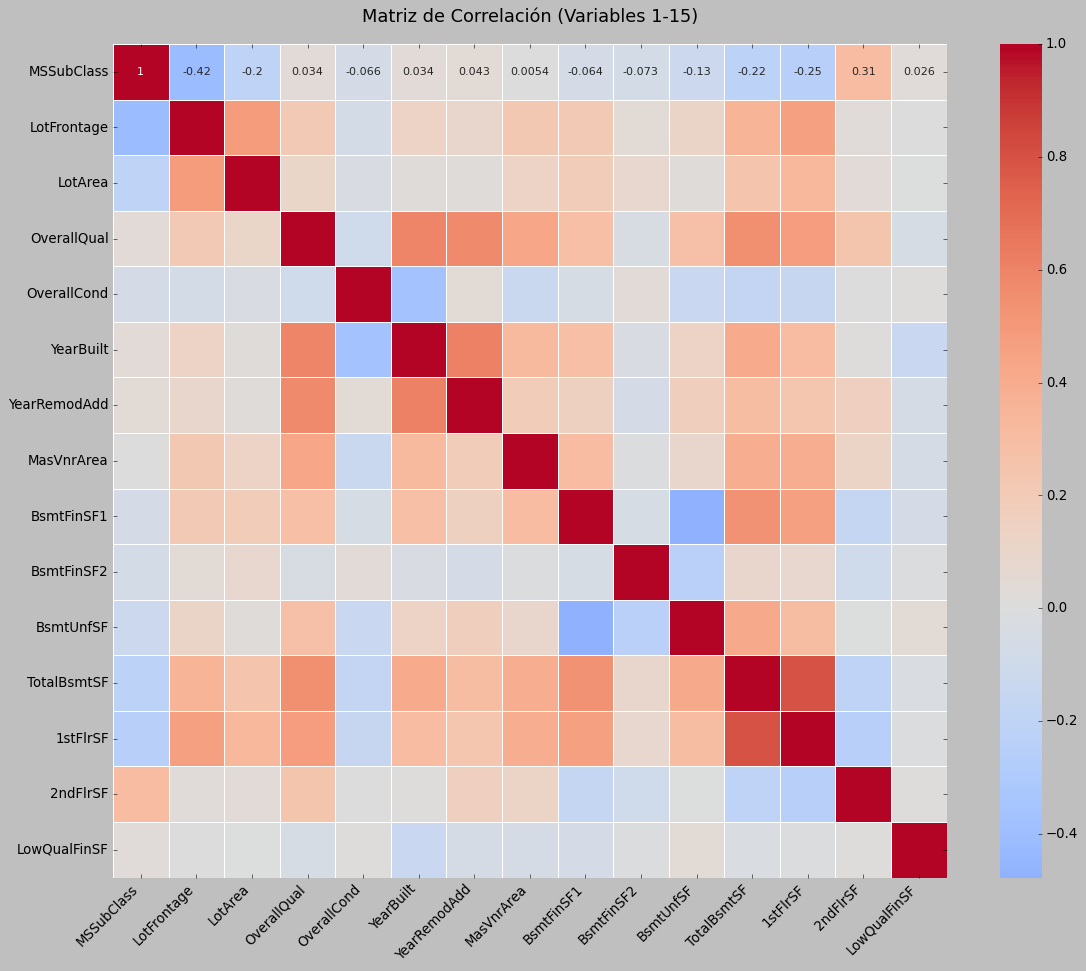

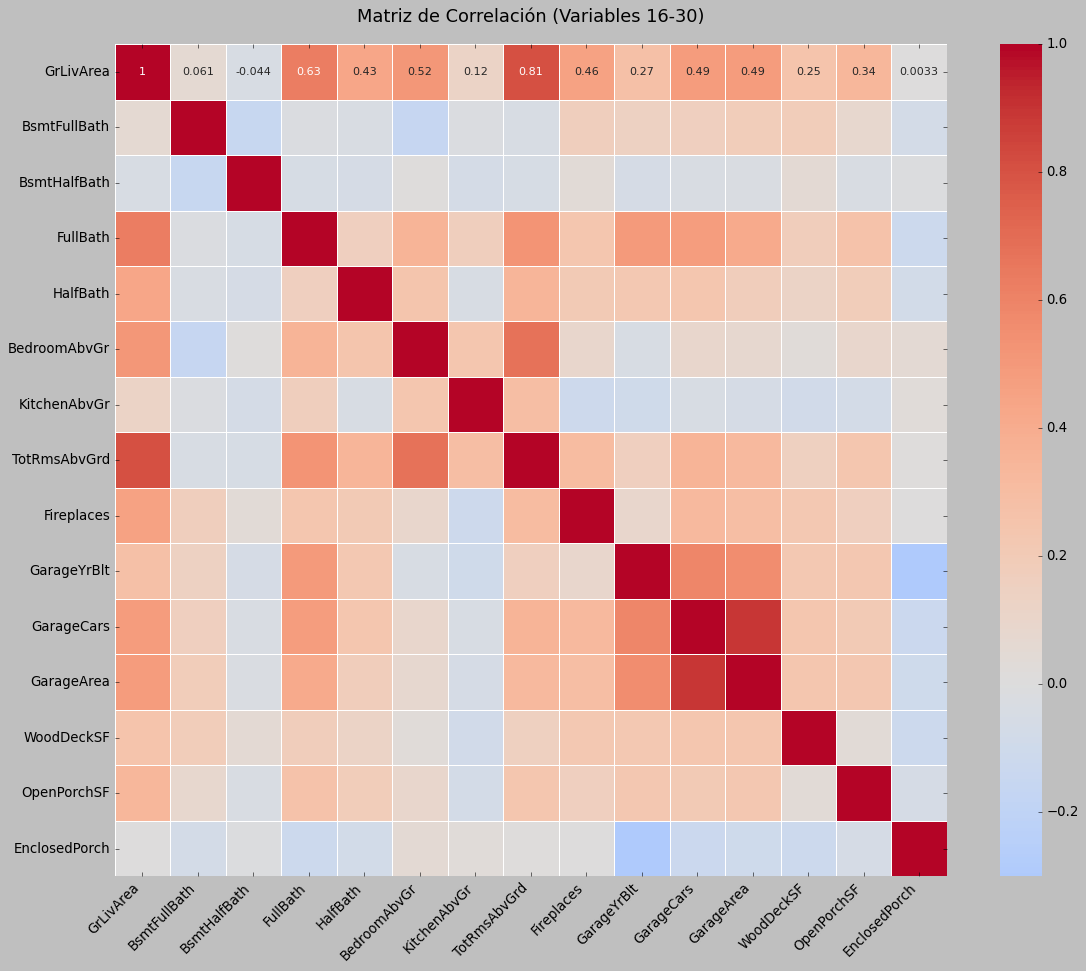

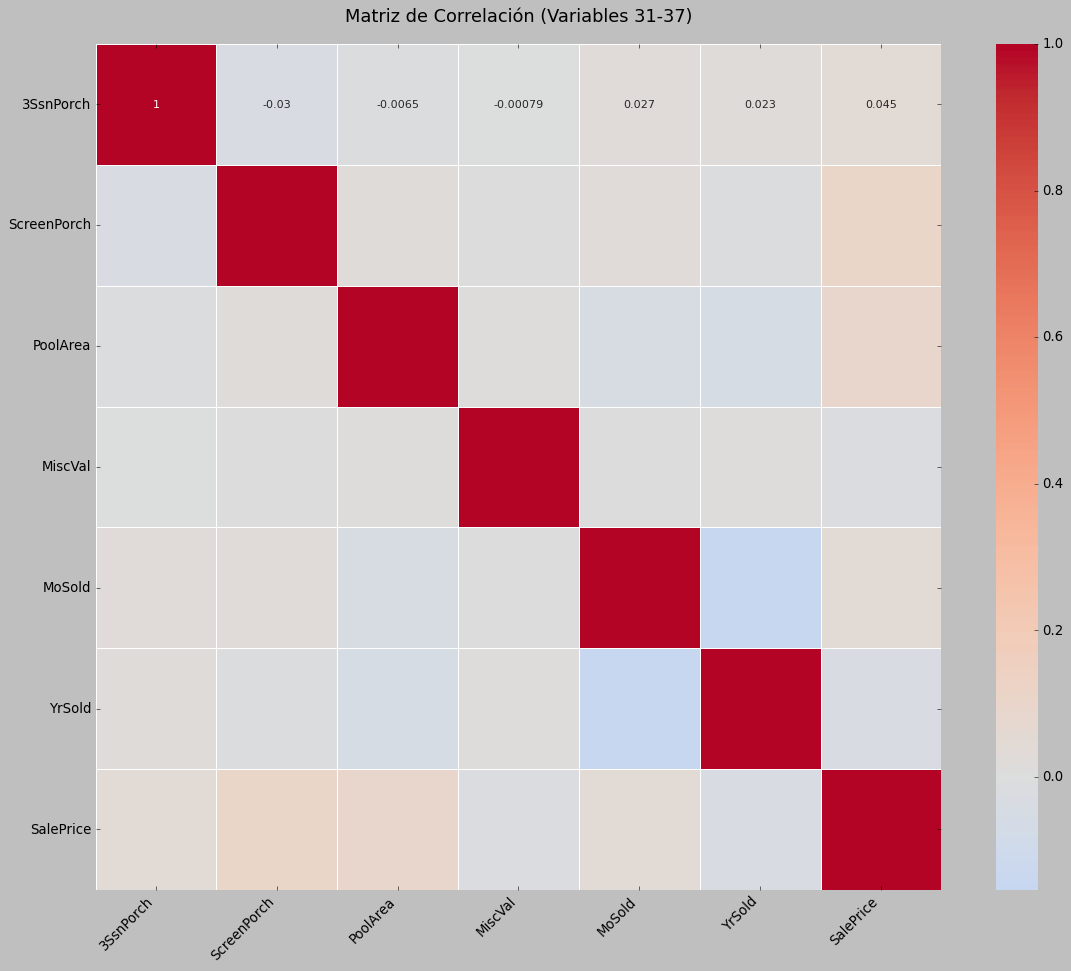

In [1035]:
def analizar_matriz_correlacion_dividida(df, numericas, max_vars=15):
    matriz_corr = df[numericas].corr()
    
    # Si hay más variables que max_vars, dividir en submatrices
    if len(numericas) > max_vars:
        for i in range(0, len(numericas), max_vars):
            vars_subset = numericas[i:i+max_vars]
            
            submatriz = matriz_corr.loc[vars_subset, vars_subset]
            
            plt.figure(figsize=(15, 12))
            sns.heatmap(submatriz,
                       annot=True,
                       fmt='.2g',
                       cmap='coolwarm',
                       center=0,
                       square=True,
                       linewidths=.5,
                       annot_kws={"size": 10})
            
            plt.title(f'Matriz de Correlación (Variables {i+1}-{i+len(vars_subset)})', 
                     pad=20, size=16)
            plt.xticks(rotation=45, ha='right', size=12)
            plt.yticks(rotation=0, size=12)
            plt.tight_layout()
            plt.show()
    
    return matriz_corr

matriz_corr = analizar_matriz_correlacion_dividida(df, numericas)

**CONCLUSIONES SOBRE LA MATRIZ**

1. **Los colores indican**:
   - **Rojo**: Correlación positiva (cuando una variable aumenta, la otra también)
   - **Azul**: Correlación negativa (cuando una variable aumenta, la otra disminuye)
   - **Blanco/Gris claro**: Correlación cercana a cero (no hay relación lineal)
   - La intensidad del color indica la fuerza de la correlación

**Correlaciones fuertes con el precio (SalePrice) y ya análizadas en pasos anteriores:**

1. **Variables muy correlacionadas positivamente** (> 0.6):
   - `OverallQual`: La calidad general de la casa
   - `GrLivArea`: Área habitable sobre el suelo
   - `GarageArea` y `GarageCars`: Tamaño del garaje
   - `TotalBsmtSF`: Área total del sótano

2. **Variables moderadamente correlacionadas** (0.4 - 0.6):
   - `YearBuilt`: Año de construcción
   - `FullBath`: Número de baños completos
   - `TotRmsAbvGrd`: Total de habitaciones sobre el suelo
   - `YearRemodAdd`: Año de remodelación

**Correlaciones importantes entre variables: (Análisis de multicolinealidad)**

1. **Correlaciones muy altas** (potencial multicolinealidad):
   - `GarageArea` - `GarageCars`: Lógico ya que representan el mismo concepto
   - `TotalBsmtSF` - `1stFlrSF`: El área del primer piso suele estar relacionada con el sótano
   - `GrLivArea` - `TotRmsAbvGrd`: El área habitable está relacionada con el número de habitaciones

2. **Correlaciones negativas significativas**:
   - `YearBuilt` con variables de condición antigua
   - Variables de edad con calidad general

### 6.2 Análisis de relaciones no lineales


Variables con posibles relaciones no lineales (diferencia > 0.1):
       Variable   Pearson  Spearman  Diferencia  Datos_Validos  Datos_Totales
2       LotArea  0.263843  0.456461    0.192617           1460           2919
28  OpenPorchSF  0.315856  0.477561    0.161704           1460           2919
5     YearBuilt  0.522897  0.652682    0.129784           1460           2919
24  GarageYrBlt  0.486362  0.593788    0.107427           1379           2919


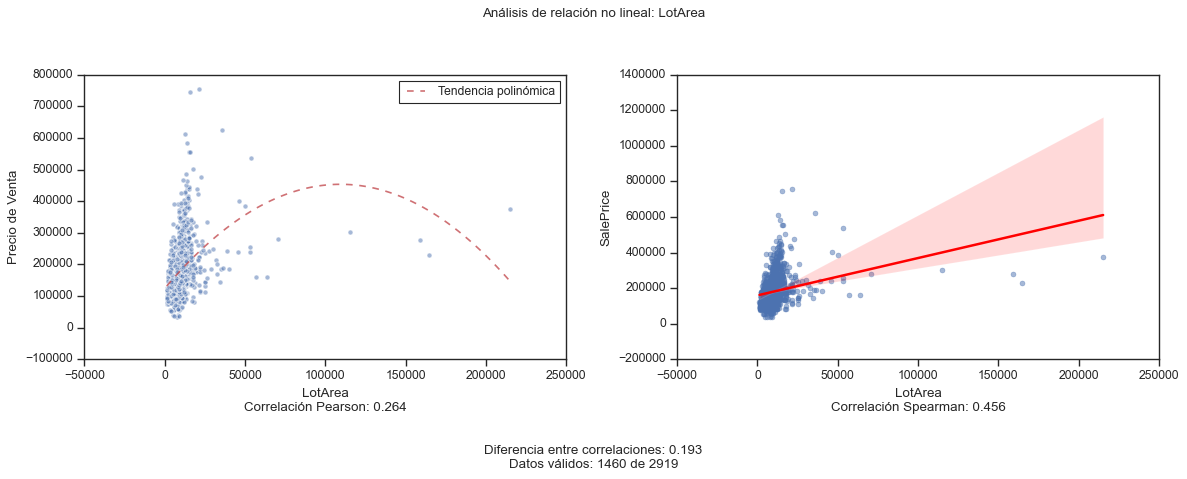

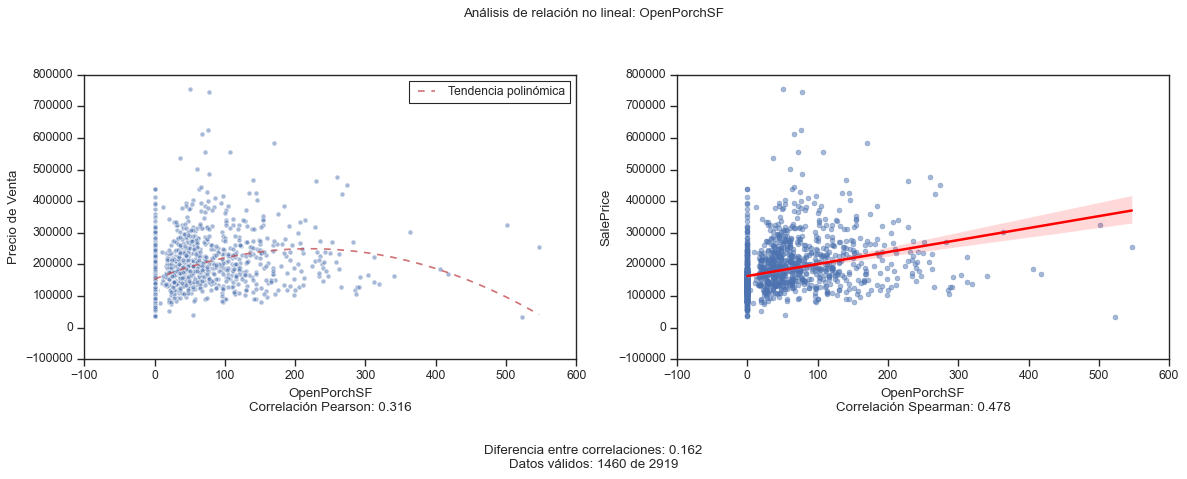

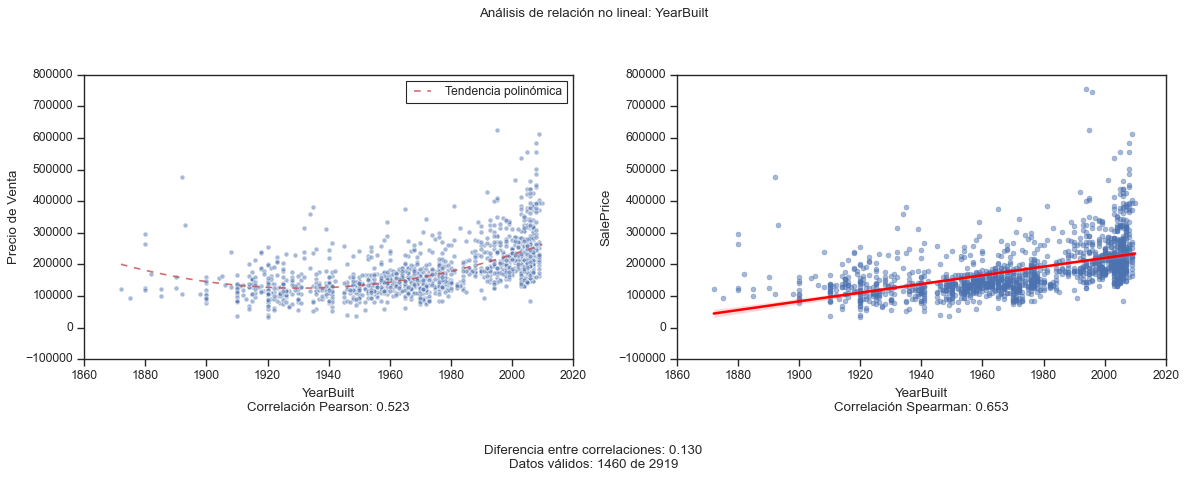

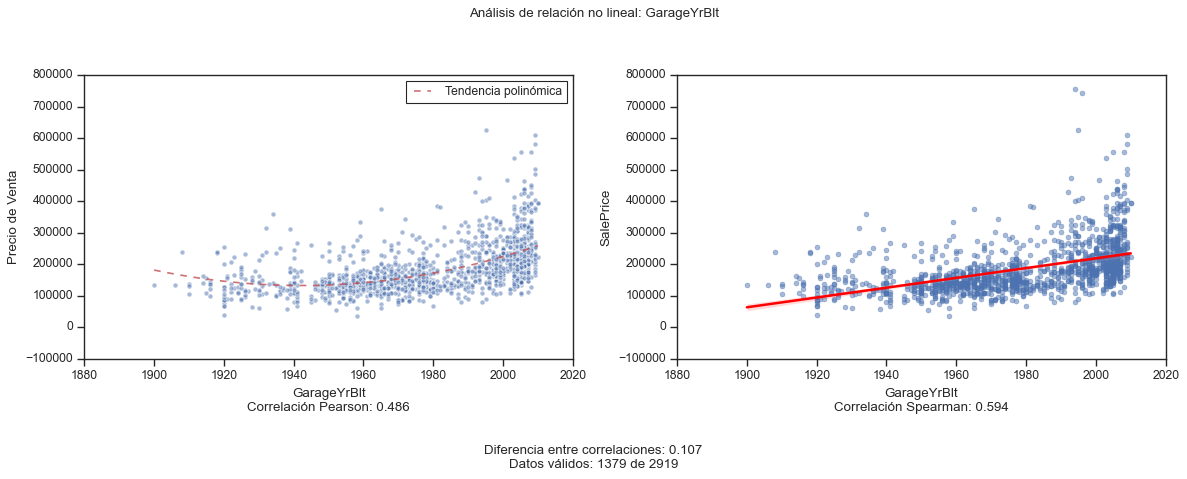


RESUMEN DE HALLAZGOS:
--------------------------------------------------
Total de variables analizadas: 36
Variables con relaciones no lineales significativas: 4

Clasificación de relaciones:
- Fuertemente no lineales (diferencia > 0.2):
[]

- Moderadamente no lineales (0.1 < diferencia ≤ 0.2):
['LotArea', 'OpenPorchSF', 'YearBuilt', 'GarageYrBlt']


In [1050]:
def analizar_relaciones_no_lineales(df, numericas):
    resultados = []
    
    for var in numericas:
        if var != 'SalePrice':
            mask = (~df[var].isin([np.inf, -np.inf])) & (~df[var].isna()) & (~df['SalePrice'].isna())
            
            if mask.sum() > 0: 
                try:
                    pearson = stats.pearsonr(df.loc[mask, var], df.loc[mask, 'SalePrice'])[0]
                    spearman = stats.spearmanr(df.loc[mask, var], df.loc[mask, 'SalePrice'])[0]
                    
                    diferencia = abs(spearman - pearson)
                    
                    resultados.append({
                        'Variable': var,
                        'Pearson': pearson,
                        'Spearman': spearman,
                        'Diferencia': diferencia,
                        'Datos_Validos': mask.sum(),
                        'Datos_Totales': len(df)
                    })
                except:
                    print(f"No se pudo analizar la variable {var}")
    
    resultados_df = pd.DataFrame(resultados)
    resultados_df = resultados_df.sort_values('Diferencia', ascending=False)
    
    print("\nVariables con posibles relaciones no lineales (diferencia > 0.1):")
    print(resultados_df[resultados_df['Diferencia'] > 0.1].to_string())
    
    for _, row in resultados_df[resultados_df['Diferencia'] > 0.1].iterrows():
        var = row['Variable']
        
        mask = (~df[var].isin([np.inf, -np.inf])) & (~df[var].isna()) & (~df['SalePrice'].isna())
        
        plt.figure(figsize=(15, 5))
        
        plt.suptitle(f'Análisis de relación no lineal: {var}', y=1.05, size=12)
        
        plt.subplot(1, 2, 1)
        plt.scatter(df.loc[mask, var], df.loc[mask, 'SalePrice'], alpha=0.5)
        plt.xlabel(f'{var}\nCorrelación Pearson: {row["Pearson"]:.3f}')
        plt.ylabel('Precio de Venta')
        
        try:
            z = np.polyfit(df.loc[mask, var], df.loc[mask, 'SalePrice'], 2)
            p = np.poly1d(z)
            x = np.linspace(df.loc[mask, var].min(), df.loc[mask, var].max(), 100)
            plt.plot(x, p(x), "r--", alpha=0.8, label='Tendencia polinómica')
            plt.legend()
        except:
            print(f"No se pudo ajustar la línea de tendencia para {var}")
        
        plt.subplot(1, 2, 2)
        sns.regplot(data=df[mask], x=var, y='SalePrice', 
                   scatter_kws={'alpha':0.5}, 
                   line_kws={'color': 'red'})
        plt.xlabel(f'{var}\nCorrelación Spearman: {row["Spearman"]:.3f}')
        
        plt.figtext(0.5, -0.1, 
                   f'Diferencia entre correlaciones: {row["Diferencia"]:.3f}\n'
                   f'Datos válidos: {row["Datos_Validos"]} de {row["Datos_Totales"]}',
                   ha='center', bbox=dict(facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
    
    print("\nRESUMEN DE HALLAZGOS:")
    print("-" * 50)
    print(f"Total de variables analizadas: {len(resultados_df)}")
    print(f"Variables con relaciones no lineales significativas: {len(resultados_df[resultados_df['Diferencia'] > 0.1])}")
    
    print("\nClasificación de relaciones:")
    print("- Fuertemente no lineales (diferencia > 0.2):")
    print(resultados_df[resultados_df['Diferencia'] > 0.2]['Variable'].tolist())
    print("\n- Moderadamente no lineales (0.1 < diferencia ≤ 0.2):")
    print(resultados_df[(resultados_df['Diferencia'] > 0.1) & 
                       (resultados_df['Diferencia'] <= 0.2)]['Variable'].tolist())
    
    return resultados_df

resultados_no_lineales = analizar_relaciones_no_lineales(df, numericas)

**Conclusiones de las variables con Relaciones No Lineales Moderadas:**

1. **LotArea** (Tamaño del lote):
   - La relación entre el tamaño del lote y el precio no es proporcional
   - Los aumentos en el tamaño del lote no se traducen en aumentos proporcionalmente lineales en el precio
   - Puede indicar que hay un "punto óptimo" de tamaño

2. **OpenPorchSF** (Área del porche abierto):
   - El impacto del tamaño del porche en el precio varía según el rango
   - Posiblemente hay un tamaño "ideal" de porche más allá del cual el valor añadido disminuye

3. **YearBuilt** (Año de construcción):
   - La edad de la casa no afecta al precio de manera lineal
   - Puede haber "períodos históricos" que afectan al precio de manera diferente
   - Casas muy antiguas podrían tener un valor histórico adicional

4. **GarageYrBlt** (Año de construcción del garaje):
   - Similar a YearBuilt, la antigüedad del garaje tiene un efecto no lineal
   - Podría estar relacionado con diferentes estilos y calidades de construcción según la época

### 6.3 Conclusiones de los análisis

# Implicaciones para el Modelado

## 1. Variables Redundantes a Tratar

### Par 1: Garaje
-  Eliminar una de estas: `GarageCars` o `GarageArea`(Decidimos mantener `GarageCars` por ser más interpretable)

### Par 2: Áreas de la Casa
- Dada  correlación entre `TotalBsmtSF` y `1stFlrSF` crearemos una variable compuesta de área total

### Par 3: Habitaciones y Área
- Eliminar una de estas: `GrLivArea` y `TotRmsAbvGrd (Decidimos mantener `GrLivArea` por ser más precisa)

### Par 4: Años
- `YearBuilt` y `GarageYrBlt` muestran alta correlación: Mantendremos `YearBuilt` y crearemos una variable de diferencia si el garaje es más nuevo

## 2. Transformaciones Necesarias

### Para Variables No Lineales:
1. `LotArea`:
   - Aplicar transformación logarítmica
   - Ayudará a linearizar la relación con el precio

2. `OpenPorchSF`:
   - Considerar transformación por raíz cuadrada

3. `YearBuilt`:
   - Crear variables dummy por períodos históricos

4. `GarageYrBlt`:
   - Convertir a edad del garaje (Crear indicador si es más nuevo que la casa)

## 3. Acciones Específicas para el Modelo

### Crear Variables Nuevas:
1. `AreaTotal` = `GrLivArea` + `TotalBsmtSF` --> Nos ayudará a capturar el espacio total habitable
2. `EdadCasa` = Año actual - `YearBuilt` -->  Refleja deterioro y estilo arquitectónico
3. `DiferenciaGaraje` = `GarageYrBlt` - `YearBuilt` --> Indica renovaciones/mejoras
4. `RatioHabitaciones` = `TotRmsAbvGrd` / `GrLivArea` --> Eficiencia del uso del espacio

### Transformaciones a Aplicar:
1. `log(LotArea)`
2. `sqrt(OpenPorchSF)`
3. Términos cuadráticos para variables de edad

### Variables a Mantener Sin Cambios:
1. `OverallQual` (mejor predictor)
2. `GarageCars` (más interpretable que área)
3. `GrLivArea` (mejor que conteo de habitaciones)

In [ ]:
## 5. Análisis de características individuales

### 5.1 Variables numéricas
- Distribuciones
- Correlaciones con SalePrice

### 5.2 Variables categóricas
- Distribución de categorías
- Relación con SalePrice

## 6. Análisis de relaciones entre variables  -> Helena

### 6.1 Matriz de correlación
### 6.2 Pairplots para variables importantes
### 6.3 Análisis de relaciones no lineales

## 7. Preparación de datos -> Paula

### 7.1 Manejo de valores faltantes
### 7.2 Transformación de variables
### 7.3 Codificación de variables categóricas
### 7.4 Creación de nuevas características

## 8. Selección de características -> Paula

### 8.1 Importancia de características
### 8.2 Eliminación de características redundantes

## 9. Modelado -> Yolanda

### 9.1 División de datos en entrenamiento y prueba
### 9.2 Selección de algoritmos de regresión
### 9.3 Entrenamiento de modelos
### 9.4 Evaluación inicial de modelos

## 10. Evaluación y ajuste del modelo -> Stella 

### 10.1 Análisis de rendimiento en datos de prueba
### 10.2 Diagnóstico de sobreajuste/subajuste
### 10.3 Ajuste de hiperparámetros

## 11. Interpretación de resultados -> Juntis <3

### 11.1 Importancia de características en el modelo final
### 11.2 Análisis de coeficientes/pesos del modelo

## 12. Validación y generalización

### 12.1 Validación cruzada
### 12.2 Discusión de limitaciones y posibles mejoras